In [2]:
#데이터 구성 패키지
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
#scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler


#데이터 분할
from sklearn.model_selection import train_test_split
#LightGBM 패키지 불러오기
from lightgbm import LGBMClassifier

#변수 중요도 확인: F1 점수 기준
from lightgbm import plot_importance
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns

from subprocess import call
from IPython.display import Image
#로지스틱 회귀
from statsmodels.api import Logit
#분류모델 평가함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score,recall_score, f1_score,roc_curve,auc
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

import scipy.stats as stats

from scipy.stats import chi2_contingency

%matplotlib inline
matplotlib.rc('font',family = 'Noto Sans CJK JP')
#-기호 false다
matplotlib.rc('axes',unicode_minus = False)

# 데이터 전처리

In [3]:
df  = pd.read_csv("dataset/SCALE불량.csv", encoding='euc-kr')
df

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PLT_1996,10JAN2023:05:32:25,양품,BV-A,프랑스,C,19,3400,41500,적용,...,1142,55,1151,86,203,1151,CR(제어압연),948,10,4조
996,PLT_1997,10JAN2023:05:39:19,양품,LR-A,영국,C,19,3400,41500,적용,...,1142,55,1151,86,209,1151,CR(제어압연),948,10,4조
997,PLT_1998,10JAN2023:05:52:41,양품,AB/AH32,미국,C,17,3400,43700,적용,...,1169,65,1163,77,227,1163,CR(제어압연),948,10,4조
998,PLT_1999,10JAN2023:06:01:50,양품,NV-A32,영국,C,17,3400,43700,적용,...,1169,65,1163,77,204,1163,CR(제어압연),948,10,4조


## 1) 결측치 확인

In [4]:
df.isnull().sum()
# 결측치 없음을 확인

plate_no           0
rolling_date       0
scale              0
spec_long          0
spec_country       0
steel_kind         0
pt_thick           0
pt_width           0
pt_length          0
hsb                0
fur_no             0
fur_input_row      0
fur_heat_temp      0
fur_heat_time      0
fur_soak_temp      0
fur_soak_time      0
fur_total_time     0
fur_ex_temp        0
rolling_method     0
rolling_temp       0
descaling_count    0
work_group         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         1000 non-null   object
 1   rolling_date     1000 non-null   object
 2   scale            1000 non-null   object
 3   spec_long        1000 non-null   object
 4   spec_country     1000 non-null   object
 5   steel_kind       1000 non-null   object
 6   pt_thick         1000 non-null   int64 
 7   pt_width         1000 non-null   int64 
 8   pt_length        1000 non-null   int64 
 9   hsb              1000 non-null   object
 10  fur_no           1000 non-null   object
 11  fur_input_row    1000 non-null   object
 12  fur_heat_temp    1000 non-null   int64 
 13  fur_heat_time    1000 non-null   int64 
 14  fur_soak_temp    1000 non-null   int64 
 15  fur_soak_time    1000 non-null   int64 
 16  fur_total_time   1000 non-null   int64 
 17  fur_ex_temp      1000 non-null   i

## 2) 이상치 확인

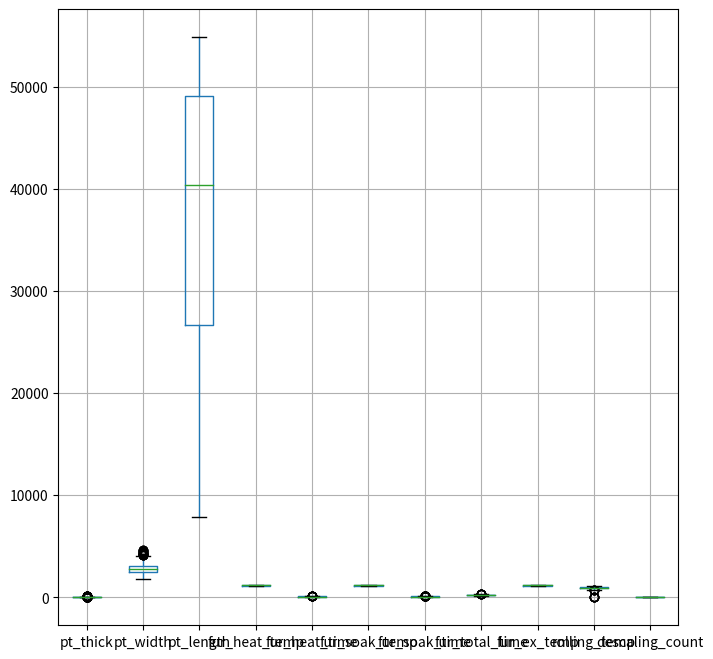

In [6]:
df.iloc[:,1:].boxplot(figsize=(8,8))
plt.show()

Text(0.5, 0, 'descaling_count')

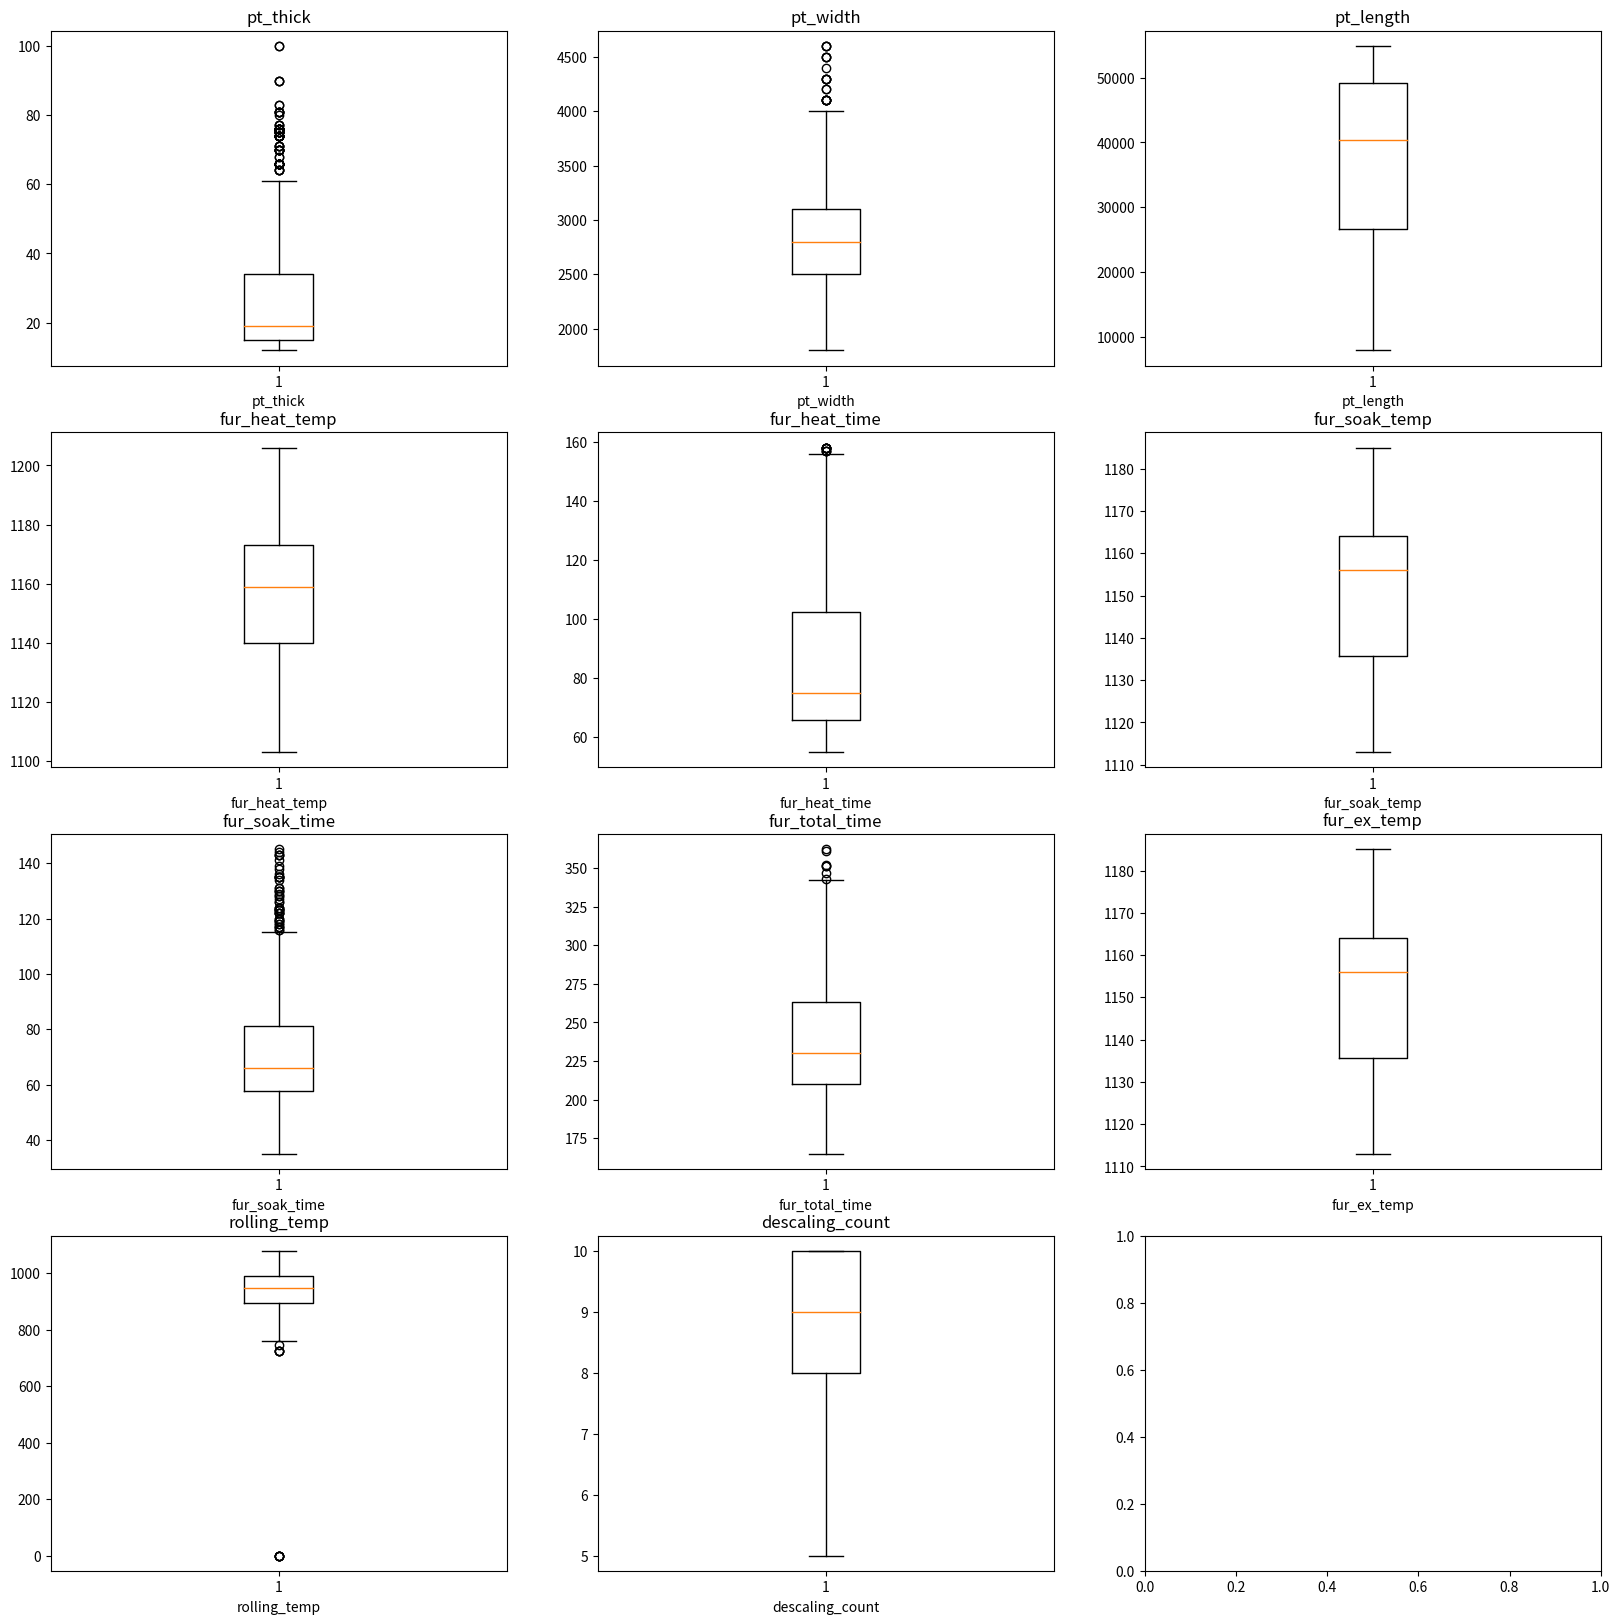

In [7]:
fig, axes = plt.subplots(nrows = 4, ncols =3, figsize = (20,20))
axes[0,0].boxplot(df["pt_thick"])
axes[0,0].set_title("pt_thick")
axes[0,0].set_xlabel("pt_thick")

axes[0,1].boxplot(df["pt_width"])
axes[0,1].set_title("pt_width")
axes[0,1].set_xlabel("pt_width")

axes[0,2].boxplot(df["pt_length"])
axes[0,2].set_title("pt_length")
axes[0,2].set_xlabel("pt_length")

axes[1,0].boxplot(df["fur_heat_temp"])
axes[1,0].set_title("fur_heat_temp")
axes[1,0].set_xlabel("fur_heat_temp")

axes[1,1].boxplot(df["fur_heat_time"])
axes[1,1].set_title("fur_heat_time")
axes[1,1].set_xlabel("fur_heat_time")

axes[1,2].boxplot(df["fur_soak_temp"])
axes[1,2].set_title("fur_soak_temp")
axes[1,2].set_xlabel("fur_soak_temp")

axes[2,0].boxplot(df["fur_soak_time"])
axes[2,0].set_title("fur_soak_time")
axes[2,0].set_xlabel("fur_soak_time")

axes[2,1].boxplot(df["fur_total_time"])
axes[2,1].set_title("fur_total_time")
axes[2,1].set_xlabel("fur_total_time")

axes[2,2].boxplot(df["fur_ex_temp"])
axes[2,2].set_title("fur_ex_temp")
axes[2,2].set_xlabel("fur_ex_temp")

axes[3,0].boxplot(df["rolling_temp"])
axes[3,0].set_title("rolling_temp")
axes[3,0].set_xlabel("rolling_temp")

axes[3,1].boxplot(df["descaling_count"])
axes[3,1].set_title("descaling_count")
axes[3,1].set_xlabel("descaling_count")

- Box plot을 통해 이상치를 대략적으로 확인
- pt_thick, pt_width, fur_heat_time, fur_soak_time, fur_total_time, rolling_temp를 세밀하게 살펴볼 필요성이 있다고 판단

In [8]:
# rolling_temp  이상치 확인
df[df['rolling_temp']<=10]

# rolling_temp가 0인 데이터 발견

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
53,PLT_1054,03JAN2023:16:22:29,양품,GL-E36-TM,독일,T,56,3800,11400,적용,...,1132,95,1128,80,244,1128,TMCP(온도제어),0,6,1조
221,PLT_1222,04JAN2023:19:44:09,양품,JS-SM490YB,일본,C,16,2200,43600,적용,...,1163,57,1166,67,228,1166,CR(제어압연),0,10,2조
222,PLT_1223,04JAN2023:19:56:39,양품,JS-SM490YB,일본,C,16,2200,43600,적용,...,1169,64,1164,61,188,1164,CR(제어압연),0,10,2조
598,PLT_1599,07JAN2023:11:40:51,양품,PILAC-BT33,한국,T,81,2100,12900,적용,...,1133,89,1122,59,229,1122,CR(제어압연),0,6,3조
599,PLT_1600,07JAN2023:11:52:00,양품,PILAC-BT33,한국,T,81,2100,13200,적용,...,1130,92,1124,61,210,1124,CR(제어압연),0,6,3조
600,PLT_1601,07JAN2023:11:59:10,양품,NV-D32-TM,영국,T,40,2500,23600,적용,...,1119,109,1117,76,260,1117,TMCP(온도제어),0,6,3조


In [9]:
df=df[df["rolling_temp"] > 10]
df.reset_index(drop=True,inplace=True)
df

# rolling_temp가 0인 데이터 이상치로 판단하고 삭제

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,PLT_1996,10JAN2023:05:32:25,양품,BV-A,프랑스,C,19,3400,41500,적용,...,1142,55,1151,86,203,1151,CR(제어압연),948,10,4조
990,PLT_1997,10JAN2023:05:39:19,양품,LR-A,영국,C,19,3400,41500,적용,...,1142,55,1151,86,209,1151,CR(제어압연),948,10,4조
991,PLT_1998,10JAN2023:05:52:41,양품,AB/AH32,미국,C,17,3400,43700,적용,...,1169,65,1163,77,227,1163,CR(제어압연),948,10,4조
992,PLT_1999,10JAN2023:06:01:50,양품,NV-A32,영국,C,17,3400,43700,적용,...,1169,65,1163,77,204,1163,CR(제어압연),948,10,4조


In [10]:
df.drop(["plate_no","rolling_date"], axis=1, inplace=True)
df.reset_index(drop=True,inplace=True)
df

# plate_no와 rolling_date는 결과값에 영향이 없는 요인이라 판단하고 변수에서 제외

/tmp/ipykernel_29668/3363118495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["plate_no","rolling_date"], axis=1, inplace=True)


,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,양품,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,양품,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,양품,BV-A,프랑스,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,203,1151,CR(제어압연),948,10,4조
990,양품,LR-A,영국,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,209,1151,CR(제어압연),948,10,4조
991,양품,AB/AH32,미국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,227,1163,CR(제어압연),948,10,4조
992,양품,NV-A32,영국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,204,1163,CR(제어압연),948,10,4조


## 변수 변경

In [11]:
# scale의 '양품', '불량품'을 1과 0으로 대체

df['scale'] = df['scale'].replace({'양품': 1, '불량': 0})
df['scale2'] = df['scale'].replace({'양품': 1, '불량': 0})

df['descaling_count'] = df['descaling_count'].astype('object')
df['scale'] = df['scale'].astype('object')
df['scale2'] = df['scale2'].astype('int64')

/tmp/ipykernel_29668/27885586.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['scale'] = df['scale'].replace({'양품': 1, '불량': 0})
/tmp/ipykernel_29668/27885586.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['scale2'] = df['scale'].replace({'양품': 1, '불량': 0})
/tmp/ipykernel_29668/27885586.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [12]:
# 바뀐 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scale            994 non-null    object
 1   spec_long        994 non-null    object
 2   spec_country     994 non-null    object
 3   steel_kind       994 non-null    object
 4   pt_thick         994 non-null    int64 
 5   pt_width         994 non-null    int64 
 6   pt_length        994 non-null    int64 
 7   hsb              994 non-null    object
 8   fur_no           994 non-null    object
 9   fur_input_row    994 non-null    object
 10  fur_heat_temp    994 non-null    int64 
 11  fur_heat_time    994 non-null    int64 
 12  fur_soak_temp    994 non-null    int64 
 13  fur_soak_time    994 non-null    int64 
 14  fur_total_time   994 non-null    int64 
 15  fur_ex_temp      994 non-null    int64 
 16  rolling_method   994 non-null    object
 17  rolling_temp     994 non-null    in

In [13]:
# 연속형 / 변수형 데이터를 새로운 변수로 지정

continuous_vars = df.select_dtypes(include=['int64'])       # 연속형 데이터
categorical_vars = df.select_dtypes(include=['object'])     # 범주형 데이터

In [14]:
continuous_vars['scale']=continuous_vars['scale2']
continuous_vars.drop("scale2", axis=1, inplace=True)
continuous_vars.reset_index(drop=True,inplace=True)

In [15]:
# 연속형 데이터 확인
continuous_vars.head()

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,scale
0,32,3700,15100,1144,116,1133,59,259,1133,934,1
1,32,3700,15100,1144,122,1135,53,238,1135,937,1
2,33,3600,19200,1129,116,1121,55,258,1121,889,1
3,33,3600,19200,1152,125,1127,68,266,1127,885,1
4,38,3100,13300,1140,134,1128,48,246,1128,873,1


In [16]:
# 범주형 데이터 확인
categorical_vars.head()

,scale,spec_long,spec_country,steel_kind,hsb,fur_no,fur_input_row,rolling_method,descaling_count,work_group
0,1,AB/EH32-TM,미국,T,적용,1호기,1열,TMCP(온도제어),8,1조
1,1,AB/EH32-TM,미국,T,적용,1호기,2열,TMCP(온도제어),8,1조
2,1,NV-E36-TM,영국,T,적용,2호기,1열,TMCP(온도제어),8,1조
3,1,NV-E36-TM,영국,T,적용,2호기,2열,TMCP(온도제어),8,1조
4,1,BV-EH36-TM,프랑스,T,적용,3호기,1열,TMCP(온도제어),8,1조


In [17]:
categorical_vars["fur_no_input"] = categorical_vars["fur_no"]+" "+categorical_vars["fur_input_row"]
categorical_vars["fur_no_input"]

categorical_vars.drop(["fur_no","fur_input_row"], axis=1, inplace=True)

df["fur_no_input"] = df["fur_no"]+" "+df["fur_input_row"]
df["fur_no_input"]

df.drop(["fur_no","fur_input_row"], axis=1, inplace=True)

categorical_vars.head()

/tmp/ipykernel_29668/3405559738.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["fur_no_input"] = df["fur_no"]+" "+df["fur_input_row"]
/tmp/ipykernel_29668/3405559738.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["fur_no","fur_input_row"], axis=1, inplace=True)


,scale,spec_long,spec_country,steel_kind,hsb,rolling_method,descaling_count,work_group,fur_no_input
0,1,AB/EH32-TM,미국,T,적용,TMCP(온도제어),8,1조,1호기 1열
1,1,AB/EH32-TM,미국,T,적용,TMCP(온도제어),8,1조,1호기 2열
2,1,NV-E36-TM,영국,T,적용,TMCP(온도제어),8,1조,2호기 1열
3,1,NV-E36-TM,영국,T,적용,TMCP(온도제어),8,1조,2호기 2열
4,1,BV-EH36-TM,프랑스,T,적용,TMCP(온도제어),8,1조,3호기 1열


## EDA

### EDA 1) 연속형 데이터 히스토그램

Text(0.5, 1.0, 'fur_ex_temp')

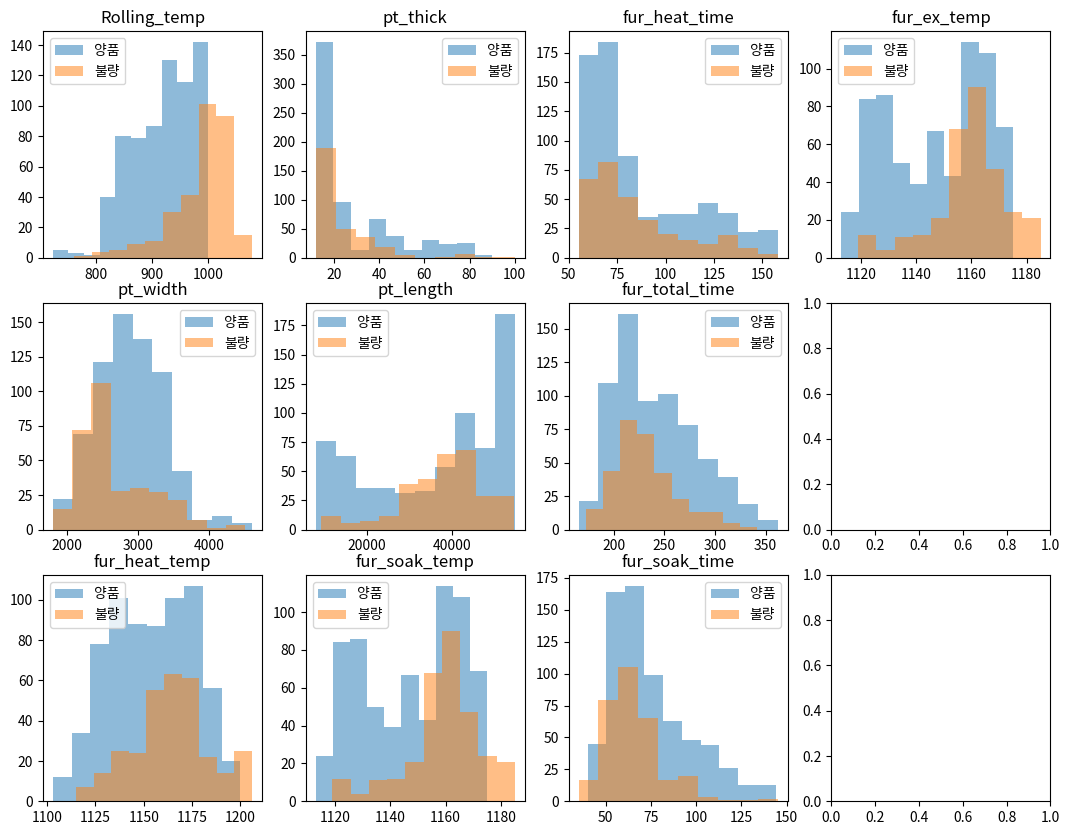

In [18]:
# 연속형 데이터 히스토그램 생성

fig, axes = plt.subplots(nrows = 3 , ncols = 4, figsize = (13,10))

axes[0,0].hist(continuous_vars[continuous_vars["scale"] == 1]["rolling_temp"], label="양품", alpha=0.5)
axes[0,0].hist(continuous_vars[continuous_vars["scale"] == 0]["rolling_temp"], label="불량", alpha=0.5)
axes[0,0].legend()
axes[0,0].set_title("Rolling_temp")

axes[0,1].hist(continuous_vars[continuous_vars["scale"] == 1]["pt_thick"], label="양품", alpha=0.5)
axes[0,1].hist(continuous_vars[continuous_vars["scale"] == 0]["pt_thick"], label="불량", alpha=0.5)
axes[0,1].legend()
axes[0,1].set_title("pt_thick")

axes[1,0].hist(continuous_vars[continuous_vars["scale"] == 1]["pt_width"], label="양품", alpha=0.5)
axes[1,0].hist(continuous_vars[continuous_vars["scale"] == 0]["pt_width"], label="불량", alpha=0.5)
axes[1,0].legend()
axes[1,0].set_title("pt_width")

axes[1,1].hist(continuous_vars[continuous_vars["scale"] == 1]["pt_length"], label="양품", alpha=0.5)
axes[1,1].hist(continuous_vars[continuous_vars["scale"] == 0]["pt_length"], label="불량", alpha=0.5)
axes[1,1].legend()
axes[1,1].set_title("pt_length")

axes[2,0].hist(continuous_vars[continuous_vars["scale"] == 1]["fur_heat_temp"], label="양품", alpha=0.5)
axes[2,0].hist(continuous_vars[continuous_vars["scale"] == 0]["fur_heat_temp"], label="불량", alpha=0.5)
axes[2,0].legend()
axes[2,0].set_title("fur_heat_temp")

axes[0,2].hist(continuous_vars[continuous_vars["scale"] == 1]["fur_heat_time"], label="양품", alpha=0.5)
axes[0,2].hist(continuous_vars[continuous_vars["scale"] == 0]["fur_heat_time"], label="불량", alpha=0.5)
axes[0,2].legend()
axes[0,2].set_title("fur_heat_time")

axes[2,1].hist(continuous_vars[continuous_vars["scale"] == 1]["fur_soak_temp"], label="양품", alpha=0.5)
axes[2,1].hist(continuous_vars[continuous_vars["scale"] == 0]["fur_soak_temp"], label="불량", alpha=0.5)
axes[2,1].legend()
axes[2,1].set_title("fur_soak_temp")

axes[2,2].hist(continuous_vars[continuous_vars["scale"] == 1]["fur_soak_time"], label="양품", alpha=0.5)
axes[2,2].hist(continuous_vars[continuous_vars["scale"] == 0]["fur_soak_time"], label="불량", alpha=0.5)
axes[2,2].legend()
axes[2,2].set_title("fur_soak_time")

axes[1,2].hist(continuous_vars[continuous_vars["scale"] == 1]["fur_total_time"], label="양품", alpha=0.5)
axes[1,2].hist(continuous_vars[continuous_vars["scale"] == 0]["fur_total_time"], label="불량", alpha=0.5)
axes[1,2].legend()
axes[1,2].set_title("fur_total_time")

axes[0,3].hist(continuous_vars[continuous_vars["scale"] == 1]["fur_ex_temp"], label="양품", alpha=0.5)
axes[0,3].hist(continuous_vars[continuous_vars["scale"] == 0]["fur_ex_temp"], label="불량", alpha=0.5)
axes[0,3].legend()
axes[0,3].set_title("fur_ex_temp")



- 'Rolling temp', 'fur_ex_temp', 'fur_heat_temp', 'fur_soak_temp' 4가지 변수들은 온도가 상승할 수록 불량률도 상승하는 모습을 보임.
- 즉, **온도와 불량률 비례**하는 것을 알 수 있음.
- 특히, 'fur_soak_time', 'fur_ex_temp'의 그래프가 거의 유사한 모습을 보이는 것을 확인. 따라서, 아래에서 두 개가 같은지 확인 후, 같으면 칼럼 하나를 삭제할 예정.
- 이 그래프에서 가장 중요한 변수로 뽑는 것을 'Rolling_temp'이다. 
- 'Rolling temp'는 양품과 불량품의 그래프가 비례관계가 아닌 것을 확인했다. 즉, 양품과 불량품이 유사하게 증가한다면, 개수가 늘어남에 따라 자연스레 불량품이 늘어나는 것이다. 하지만, 'Rolling temp'는 그 관계가 비례적이지 않고, 양품과 불량품의 관계가 없어 보인다.
- 따라서, **'Rolling temp'를 주요 변수**로 삼는다.

In [19]:
diff = continuous_vars['fur_soak_temp'] - continuous_vars['fur_ex_temp']

if (diff != 0).any():
    print(diff)

# fur_soak_temp와 fur_ex_temp 값 비교

In [20]:
df.drop(["fur_ex_temp"], axis=1, inplace=True)
df.reset_index(drop=True,inplace=True)

/tmp/ipykernel_29668/1091964883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["fur_ex_temp"], axis=1, inplace=True)


- fur_soak_temp와 fur_ex_temp의 값이 같으므로 fur_ex_temp 변수 삭제

### EDA 2) 범주형 데이터 히스토그램

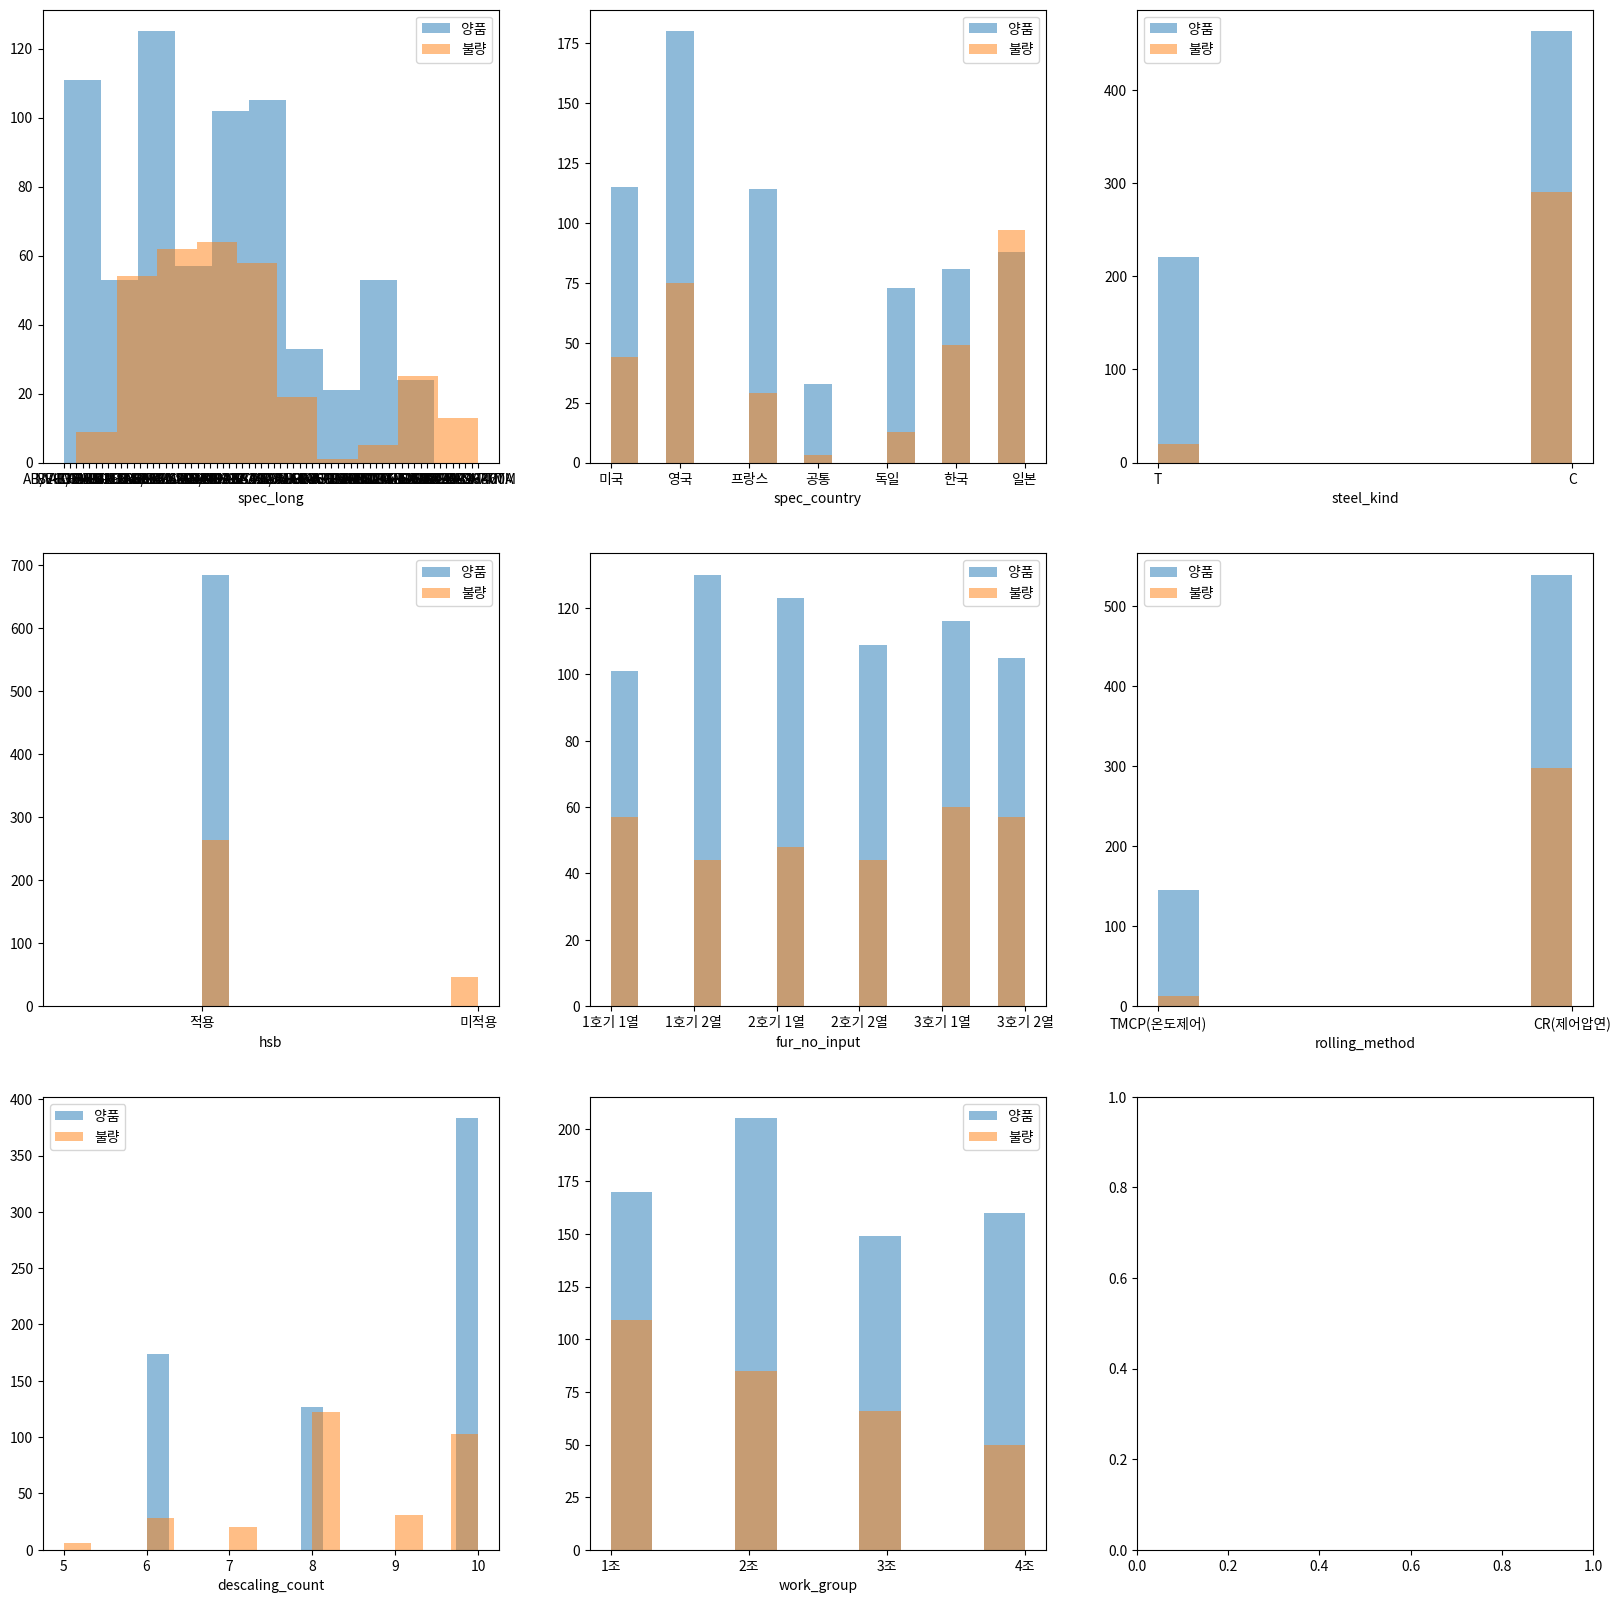

In [21]:
# 범주형 데이터 히스토그램 생성

good_products = categorical_vars[categorical_vars["scale"] == 1]
bad_products = categorical_vars[categorical_vars["scale"] == 0]
fig, axes = plt.subplots(nrows = 3, ncols =3, figsize = (20,20))

axes[0,0].hist(good_products["spec_long"], label="양품", alpha=0.5)
axes[0,0].hist(bad_products["spec_long"], label="불량", alpha=0.5)
axes[0,0].set_xlabel("spec_long")
axes[0,0].legend()

axes[0,1].hist(good_products["spec_country"], label="양품", alpha=0.5, bins = 15)
axes[0,1].hist(bad_products["spec_country"], label="불량", alpha=0.5,bins = 15)
axes[0,1].set_xlabel("spec_country")
axes[0,1].legend()

axes[0,2].hist(good_products["steel_kind"], label="양품", alpha=0.5)
axes[0,2].hist(bad_products["steel_kind"], label="불량", alpha=0.5)
axes[0,2].set_xlabel("steel_kind")
axes[0,2].legend()

axes[1,0].hist(good_products["hsb"], label="양품", alpha=0.5)
axes[1,0].hist(bad_products["hsb"], label="불량", alpha=0.5)
axes[1,0].set_xlabel("hsb")
axes[1,0].legend()

axes[1,1].hist(good_products["fur_no_input"], label="양품", alpha=0.5,bins = 15)
axes[1,1].hist(bad_products["fur_no_input"], label="불량", alpha=0.5,bins = 15)
axes[1,1].set_xlabel("fur_no_input")
axes[1,1].legend()


#범주형 그래프 모음집
axes[1,2].hist(good_products["rolling_method"], label="양품", alpha=0.5)
axes[1,2].hist(bad_products["rolling_method"], label="불량", alpha=0.5)
axes[1,2].set_xlabel("rolling_method")
axes[1,2].legend()

axes[2,0].hist(good_products["descaling_count"], label="양품", alpha=0.5,bins = 15)
axes[2,0].hist(bad_products["descaling_count"], label="불량", alpha=0.5,bins = 15)
axes[2,0].set_xlabel("descaling_count")
axes[2,0].legend()

axes[2,1].hist(good_products["work_group"], label="양품", alpha=0.5)
axes[2,1].hist(bad_products["work_group"], label="불량", alpha=0.5)
axes[2,1].set_xlabel("work_group")
axes[2,1].legend()


- descaling_count가 8~10일 때 불량이 많아지는 것을 확인할 수 있었다. 또한, descaling 횟수가 홀수일 때는 양품은 존재하지 않고 무조건 불량품만 나오는 것을 확인했다.
- work_group은 1조에서 가장 불량품이 높은 것을 확인할 수 있었다. 모델링 할 때 주/야간을 나눠서 확인할 필요가 있다.
- rolling_method는 'TMCP'와 'CR'로 나뉘는데, 'TMCP'의 경우, 양품이 불량품에 비해 훨씬 잘 나오고, 'CR'의 경우, 양품과 불량품의 비율이 절반 정도인 것을 확인했다.
- HBS는 미적용을 하면 무조건 불량품이 나온다. 
- spec_country에서 특정 국가들이 양품보다 불량품의 비율이 높은 모습을 보인다.

### EDA 3) cross table

In [22]:
pd.crosstab(categorical_vars['scale'], categorical_vars['spec_country'])

# 나라별로 양품과 불량품의 비율이 각각 다르지만, 이는데, 각 나라마다 불량품의 규격이 다를 수 있고, 이는 고객의 니즈에 맞춰 만드므로 불량 요인으로 보기 어려울 것 같다. 
# 따라서, spec_country는 모델링 변수에서 제거한다.

spec_country,공통,독일,미국,영국,일본,프랑스,한국
scale,,,,,,,
0,3,13,44,75,97,29,49
1,33,73,115,180,88,114,81


In [23]:
pd.crosstab(categorical_vars['scale'], categorical_vars['hsb'])

# hsb는 시행하지 않을 경우 무조건 불량이 된다.

hsb,미적용,적용
scale,,
0,47,263
1,0,684


In [24]:
pd.crosstab(categorical_vars['scale'], categorical_vars['rolling_method'])

# TMCP는 불량이 나오는 확률이 적은 반면, CR의 경우 50%가 넘는다. CR이 불량품을 만드는 요인 중 하나라고 생각한다.

rolling_method,CR(제어압연),TMCP(온도제어)
scale,,
0,297,13
1,539,145


In [25]:
pd.crosstab(categorical_vars['scale'], categorical_vars['descaling_count'])

# 홀수 횟수번에서 불량품이 나오는 것을 확인한다.

descaling_count,5,6,7,8,9,10
scale,,,,,,
0,6,28,20,122,31,103
1,0,174,0,127,0,383


In [26]:
pd.crosstab(categorical_vars['scale'], categorical_vars['work_group'])

# 1조에서 불량률이 높다.

work_group,1조,2조,3조,4조
scale,,,,
0,109,85,66,50
1,170,205,149,160


### EDA 4) 연속형 데이터의 상관관계 분석

In [27]:
# 연속형 데이터의 상관관계 분석
corr, pval = stats.pearsonr(df['scale'],df['rolling_temp'])
print("Rolling_temp : Correlation Analysis")
print("corr:{0:0.3f}".format(corr))
print("p-value:{0:0.3f}".format(pval))
print()


corr, pval = stats.pearsonr(df['scale'],df['pt_thick'])
print("pt_thick : Correlation Analysis")
print("corr:{0:0.3f}".format(corr))
print("p-value:{0:0.3f}".format(pval))
print()

corr, pval = stats.pearsonr(df['scale'],df['pt_width'])
print("pt_width : Correlation Analysis")
print("corr:{0:0.3f}".format(corr))
print("p-value:{0:0.3f}".format(pval))
print()

corr, pval = stats.pearsonr(df['scale'],df['pt_length'])
print("pt_length : Correlation Analysis")
print("corr:{0:0.3f}".format(corr))
print("p-value:{0:0.3f}".format(pval))
print()


corr, pval = stats.pearsonr(df['scale'],df['fur_heat_temp'])
print("fur_heat_temp : Correlation Analysis")
print("corr:{0:0.3f}".format(corr))
print("p-value:{0:0.3f}".format(pval))
print()

corr, pval = stats.pearsonr(df['scale'],df['fur_heat_time'])
print("fur_heat_time : Correlation Analysis")
print("corr:{0:0.3f}".format(corr))
print("p-value:{0:0.3f}".format(pval))
print()

corr, pval = stats.pearsonr(df['scale'],df['fur_soak_time'])
print("fur_soak_time : Correlation Analysis")
print("corr:{0:0.3f}".format(corr))
print("p-value:{0:0.3f}".format(pval))
print()


corr, pval = stats.pearsonr(df['scale'],df['fur_total_time'])
print("fur_total_time : Correlation Analysis")
print("corr:{0:0.3f}".format(corr))
print("p-value:{0:0.3f}".format(pval))
print()


corr, pval = stats.pearsonr(df['scale'],df['fur_soak_temp'])
print("fur_soak_temp : Correlation Analysis")
print("corr:{0:0.3f}".format(corr))
print("p-value:{0:0.3f}".format(pval))
print()

Rolling_temp : Correlation Analysis
corr:-0.511
p-value:0.000

pt_thick : Correlation Analysis
corr:0.094
p-value:0.003

pt_width : Correlation Analysis
corr:0.194
p-value:0.000

pt_length : Correlation Analysis
corr:-0.049
p-value:0.123

fur_heat_temp : Correlation Analysis
corr:-0.221
p-value:0.000

fur_heat_time : Correlation Analysis
corr:0.036
p-value:0.254

fur_soak_time : Correlation Analysis
corr:0.221
p-value:0.000

fur_total_time : Correlation Analysis
corr:0.129
p-value:0.000

fur_soak_temp : Correlation Analysis
corr:-0.327
p-value:0.000



- pt_length와 fur_heat_time은 p-value가 유의 수준 0.05에 비해 높은 것을 확인했다. 즉, 상관관계가 없다는 것을 확인하고 모델링 변수에서 제거하기로 한다.
- 위에 두 개의 변수를 제외하고는 상관관계가 있다. 특히, 'rolling temp'가 상관관계가 높은 축에 속한 것을 확인했다.

In [28]:
# 범주형 데이터의 상관관계 분석
corr, pval = stats.kendalltau(df['scale'],df['spec_long'])
print("spec_long : Correlation Analysis")
print("corr:{0:0.3f}".format(corr))
print("p-value:{0:0.3f}".format(pval))
print()

corr, pval = stats.kendalltau(df['scale'],df['spec_country'])
print("spec_country : Correlation Analysis")
print("corr:{0:0.3f}".format(corr))
print("p-value:{0:0.3f}".format(pval))
print()


corr, pval = stats.kendalltau(df['scale'],df['steel_kind'])
print("steel_kind : Correlation Analysis")
print("corr:{0:.3f}".format(corr))
print('p-value: {0:0.3f}'.format(pval))
print()

corr, pval = stats.kendalltau(df['scale'],df['hsb'])
print("hsb : Correlation Analysis")
print("corr:{0:.3f}".format(corr))
print('p-value: {0:0.3f}'.format(pval))
print()

corr, pval = stats.kendalltau(df['scale'],df['fur_no_input'])
print("fur_no_input : Correlation Analysis")
print("corr:{0:.3f}".format(corr))
print('p-value: {0:0.3f}'.format(pval))
print()

corr, pval = stats.kendalltau(df['scale'],df['rolling_method'])
print("rolling_method : Correlation Analysis")
print("corr:{0:.3f}".format(corr))
print('p-value: {0:0.3f}'.format(pval))
print()


corr, pval = stats.kendalltau(df['scale'],df['descaling_count'])
print("descaling_count : Correlation Analysis")
print("corr:{0:.3f}".format(corr))
print('p-value: {0:0.3f}'.format(pval))
print()


corr, pval = stats.kendalltau(df['scale'],df['work_group'])
print("work_group : Correlation Analysis")
print("corr:{0:.3f}".format(corr))
print('p-value: {0:0.3f}'.format(pval))
print()


spec_long : Correlation Analysis
corr:-0.031
p-value:0.235

spec_country : Correlation Analysis
corr:-0.109
p-value:0.000

steel_kind : Correlation Analysis
corr:0.280
p-value: 0.000

hsb : Correlation Analysis
corr:0.331
p-value: 0.000

fur_no_input : Correlation Analysis
corr:-0.023
p-value: 0.406

rolling_method : Correlation Analysis
corr:0.215
p-value: 0.000

descaling_count : Correlation Analysis
corr:0.084
p-value: 0.004

work_group : Correlation Analysis
corr:0.098
p-value: 0.001



- spec_long와 fur_no_input이 p-value가 유의 수준 0.05에 비해 높은 것을 확인했다. 즉, 상관관계가 없다는 것을 확인하고 모델링 변수에서 제거하기로 한다.
- 위의 두 개의 변수를 제외하고는 상관관계가 있다. 연속형 범주에 비해 상관관계 유의미하게 있어 보이는 변수는 존재하지 않았다.

- 연속: pt_length, fur_heat_time<br>
- 범주: spec_long, fur_no_input<br>
- 위 변수들은 p-value의 값이 0.05보다 높아 최종적으로 변수를 제거하고자 한다.

In [29]:
# 연속형 변수 확인
continuous_vars.head()

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,scale
0,32,3700,15100,1144,116,1133,59,259,1133,934,1
1,32,3700,15100,1144,122,1135,53,238,1135,937,1
2,33,3600,19200,1129,116,1121,55,258,1121,889,1
3,33,3600,19200,1152,125,1127,68,266,1127,885,1
4,38,3100,13300,1140,134,1128,48,246,1128,873,1


In [30]:
# 범주형 변수 확인
categorical_vars.head()

,scale,spec_long,spec_country,steel_kind,hsb,rolling_method,descaling_count,work_group,fur_no_input
0,1,AB/EH32-TM,미국,T,적용,TMCP(온도제어),8,1조,1호기 1열
1,1,AB/EH32-TM,미국,T,적용,TMCP(온도제어),8,1조,1호기 2열
2,1,NV-E36-TM,영국,T,적용,TMCP(온도제어),8,1조,2호기 1열
3,1,NV-E36-TM,영국,T,적용,TMCP(온도제어),8,1조,2호기 2열
4,1,BV-EH36-TM,프랑스,T,적용,TMCP(온도제어),8,1조,3호기 1열


In [31]:
# 범주형 변수에서 무의미한 변수들 제거
categorical_vars.drop(["spec_long","fur_no_input"], axis=1, inplace=True)
categorical_vars.reset_index(drop=True,inplace=True)
categorical_vars

,scale,spec_country,steel_kind,hsb,rolling_method,descaling_count,work_group
0,1,미국,T,적용,TMCP(온도제어),8,1조
1,1,미국,T,적용,TMCP(온도제어),8,1조
2,1,영국,T,적용,TMCP(온도제어),8,1조
3,1,영국,T,적용,TMCP(온도제어),8,1조
4,1,프랑스,T,적용,TMCP(온도제어),8,1조
...,...,...,...,...,...,...,...
989,1,프랑스,C,적용,CR(제어압연),10,4조
990,1,영국,C,적용,CR(제어압연),10,4조
991,1,미국,C,적용,CR(제어압연),10,4조
992,1,영국,C,적용,CR(제어압연),10,4조


### EDA 5) 카이제곱 검정

In [32]:
# H0 : scale과 descaling_count는 관계가 없다.
# H1 : scale과 descaling_count는 관계가 있다.

# descaling_count 불량률 계산
defect_rate_by_descaling_count = categorical_vars.groupby('descaling_count')['scale'].mean()

# 카이제곱 검정 수행
contingency_table = pd.crosstab(categorical_vars['scale'], categorical_vars['descaling_count'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Defect Rate by Spec Long:")
print(defect_rate_by_descaling_count)
print("\nChi-squared test results:")
print(f"Chi-squared: {chi2.round(3)}")
print(f"P-value: {p_value.round(3)}")
print(f"Degrees of Freedom: {dof}")

Defect Rate by Spec Long:
descaling_count
5     0.000000
6     0.861386
7     0.000000
8     0.510040
9     0.000000
10    0.788066
Name: scale, dtype: float64

Chi-squared test results:
Chi-squared: 213.438
P-value: 0.0
Degrees of Freedom: 5


- 유의 수준 0.05에 대해서 p-value 값이 0.0으로 귀무가설을 기각하고 대립가설을 채택한다. 즉, 두 개의 변수 관계는 상관관계가 있음을 확인했다.

In [33]:
# H0 : scale과 work_group는 관계가 없다.
# H1 : scale과 work_group는 관계가 있다.

# work_group 불량률 계산
defect_rate_by_spec_long = categorical_vars.groupby('work_group')['scale'].mean()

# 카이제곱 검정 수행
contingency_table = pd.crosstab(categorical_vars['scale'], categorical_vars['work_group'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Defect Rate by Spec Long:")
print(defect_rate_by_spec_long)
print("\nChi-squared test results:")
print(f"Chi-squared: {chi2.round(3)}")
print(f"P-value: {p_value.round(3)}")
print(f"Degrees of Freedom: {dof}")

Defect Rate by Spec Long:
work_group
1조    0.609319
2조    0.706897
3조    0.693023
4조    0.761905
Name: scale, dtype: float64

Chi-squared test results:
Chi-squared: 13.901
P-value: 0.003
Degrees of Freedom: 3


- 유의 수준 0.05에 대해서 p-value 값이 0.3으로 귀무가설을 기각하고 대립가설을 채택한다. 즉, 두 개의 변수 관계는 상관관계가 있음을 확인했다.

In [34]:
# H0 : scale과 spec_country는 관계가 없다.
# H1 : scale과 spec_country는 관계가 있다.

# spec_country 불량률 계산
defect_rate_by_spec_long = categorical_vars.groupby('spec_country')['scale'].mean()

# 카이제곱 검정 수행
contingency_table = pd.crosstab(categorical_vars['scale'], categorical_vars['spec_country'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Defect Rate by Spec Long:")
print(defect_rate_by_spec_long)
print("\nChi-squared test results:")
print(f"Chi-squared: {chi2.round(3)}")
print(f"P-value: {p_value.round(3)}")
print(f"Degrees of Freedom: {dof}")

Defect Rate by Spec Long:
spec_country
공통     0.916667
독일     0.848837
미국     0.723270
영국     0.705882
일본     0.475676
프랑스    0.797203
한국     0.623077
Name: scale, dtype: float64

Chi-squared test results:
Chi-squared: 69.801
P-value: 0.0
Degrees of Freedom: 6


- 유의 수준 0.05에 대해서 p-value 값이 0.0으로 귀무가설을 기각하고 대립가설을 채택한다. 즉, 두 개의 변수 관계는 상관관계가 있음을 확인했다.

In [35]:
# H0 : scale과 steel_kind는 관계가 없다.
# H1 : scale과 steel_kind는 관계가 있다.

# steel_kind 불량률 계산
defect_rate_by_steel_kind = categorical_vars.groupby('steel_kind')['scale'].mean()

# 카이제곱 검정 수행
contingency_table = pd.crosstab(categorical_vars['scale'], categorical_vars['steel_kind'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Defect Rate by Spec Long:")
print(defect_rate_by_steel_kind)
print("\nChi-squared test results:")
print(f"Chi-squared: {chi2.round(3)}")
print(f"P-value: {p_value.round(3)}")
print(f"Degrees of Freedom: {dof}")

Defect Rate by Spec Long:
steel_kind
C    0.614874
T    0.917012
Name: scale, dtype: float64

Chi-squared test results:
Chi-squared: 76.258
P-value: 0.0
Degrees of Freedom: 1


- 유의 수준 0.05에 대해서 p-value 값이 0.0으로 귀무가설을 기각하고 대립가설을 채택한다. 즉, 두 개의 변수 관계는 상관관계가 있음을 확인했다.

In [36]:
# H0 : scale과 hsb는 관계가 없다.
# H1 : scale과 hsb는 관계가 있다.

# hsb 불량률 계산
defect_rate_by_hsb = categorical_vars.groupby('hsb')['scale'].mean()

# 카이제곱 검정 수행
contingency_table = pd.crosstab(categorical_vars['scale'], categorical_vars['hsb'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Defect Rate by Spec Long:")
print(defect_rate_by_hsb)
print("\nChi-squared test results:")
print(f"Chi-squared: {chi2.round(3)}")
print(f"P-value: {p_value.round(3)}")
print(f"Degrees of Freedom: {dof}")

Defect Rate by Spec Long:
hsb
미적용    0.000000
적용     0.722281
Name: scale, dtype: float64

Chi-squared test results:
Chi-squared: 105.51
P-value: 0.0
Degrees of Freedom: 1


- 유의 수준 0.05에 대해서 p-value 값이 0.0으로 귀무가설을 기각하고 대립가설을 채택한다. 즉, 두 개의 변수 관계는 상관관계가 있음을 확인했다.

In [37]:
# H0 : scale과 rolling_method는 관계가 없다.
# H1 : scale과 rolling_method는 관계가 있다.

# rolling_method 불량률 계산
defect_rate_by_rolling_method = categorical_vars.groupby('rolling_method')['scale'].mean()

# 카이제곱 검정 수행
contingency_table = pd.crosstab(categorical_vars['scale'], categorical_vars['rolling_method'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Defect Rate by Spec Long:")
print(defect_rate_by_rolling_method)
print("\nChi-squared test results:")
print(f"Chi-squared: {chi2.round(3)}")
print(f"P-value: {p_value.round(3)}")
print(f"Degrees of Freedom: {dof}")

Defect Rate by Spec Long:
rolling_method
CR(제어압연)      0.644737
TMCP(온도제어)    0.917722
Name: scale, dtype: float64

Chi-squared test results:
Chi-squared: 44.88
P-value: 0.0
Degrees of Freedom: 1


- 유의 수준 0.05에 대해서 p-value 값이 0.0으로 귀무가설을 기각하고 대립가설을 채택한다. 즉, 두 개의 변수 관계는 상관관계가 있음을 확인했다.

In [38]:
df.head()

,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,scale2,fur_no_input
0,1,AB/EH32-TM,미국,T,32,3700,15100,적용,1144,116,1133,59,259,TMCP(온도제어),934,8,1조,1,1호기 1열
1,1,AB/EH32-TM,미국,T,32,3700,15100,적용,1144,122,1135,53,238,TMCP(온도제어),937,8,1조,1,1호기 2열
2,1,NV-E36-TM,영국,T,33,3600,19200,적용,1129,116,1121,55,258,TMCP(온도제어),889,8,1조,1,2호기 1열
3,1,NV-E36-TM,영국,T,33,3600,19200,적용,1152,125,1127,68,266,TMCP(온도제어),885,8,1조,1,2호기 2열
4,1,BV-EH36-TM,프랑스,T,38,3100,13300,적용,1140,134,1128,48,246,TMCP(온도제어),873,8,1조,1,3호기 1열


### EDA 6) 변수 조정

In [39]:
# 전체 데이터에서 필요없는 변수들 제거

df.drop(["spec_country","spec_long", "pt_length", "fur_heat_time","fur_no_input", "scale2"], axis=1, inplace=True)
df.reset_index(drop=True,inplace=True)

df['work_group'] = np.where((df["work_group"] == "1조") | (df["work_group"] == "3조"), "주간", "야간")
df['rolling_method'] = df['rolling_method'].replace("TMCP(온도제어)","TMCP")

/tmp/ipykernel_29668/2979103925.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["spec_country","spec_long", "pt_length", "fur_heat_time","fur_no_input", "scale2"], axis=1, inplace=True)
/tmp/ipykernel_29668/2979103925.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['work_group'] = np.where((df["work_group"] == "1조") | (df["work_group"] == "3조"), "주간", "야간")
/tmp/ipykernel_29668/2979103925.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [40]:
# 더미변수화
df_dummy = pd.get_dummies(df, columns=['work_group', 'descaling_count', 'steel_kind','rolling_method','hsb'], drop_first=True)
df_dummy

/tmp/ipykernel_29668/2127004998.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_dummy = pd.get_dummies(df, columns=['work_group', 'descaling_count', 'steel_kind','rolling_method','hsb'], drop_first=True)


,scale,pt_thick,pt_width,fur_heat_temp,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,work_group_주간,descaling_count_6,descaling_count_7,descaling_count_8,descaling_count_9,descaling_count_10,steel_kind_T,rolling_method_TMCP,hsb_적용
0,1,32,3700,1144,1133,59,259,934,1,0,0,1,0,0,1,1,1
1,1,32,3700,1144,1135,53,238,937,1,0,0,1,0,0,1,1,1
2,1,33,3600,1129,1121,55,258,889,1,0,0,1,0,0,1,1,1
3,1,33,3600,1152,1127,68,266,885,1,0,0,1,0,0,1,1,1
4,1,38,3100,1140,1128,48,246,873,1,0,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,1,19,3400,1142,1151,86,203,948,0,0,0,0,0,1,0,0,1
990,1,19,3400,1142,1151,86,209,948,0,0,0,0,0,1,0,0,1
991,1,17,3400,1169,1163,77,227,948,0,0,0,0,0,1,0,0,1
992,1,17,3400,1169,1163,77,204,948,0,0,0,0,0,1,0,0,1


In [41]:
# 변수명 변경
df['rolling_method'] = df['rolling_method'].replace("TMCP(온도제어)","TMCP")

/tmp/ipykernel_29668/2665296646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rolling_method'] = df['rolling_method'].replace("TMCP(온도제어)","TMCP")


# 분류 분석 1) 로지스틱 회귀분석

In [42]:
df['scale'] = df['scale'].astype('int64')
df_dummy = pd.get_dummies(df, columns=['work_group', 'descaling_count', 'steel_kind','rolling_method','hsb'], drop_first=True)
df_dummy

/tmp/ipykernel_29668/3057438163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['scale'] = df['scale'].astype('int64')
/tmp/ipykernel_29668/3057438163.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_dummy = pd.get_dummies(df, columns=['work_group', 'descaling_count', 'steel_kind','rolling_method','hsb'], drop_first=True)


,scale,pt_thick,pt_width,fur_heat_temp,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,work_group_주간,descaling_count_6,descaling_count_7,descaling_count_8,descaling_count_9,descaling_count_10,steel_kind_T,rolling_method_TMCP,hsb_적용
0,1,32,3700,1144,1133,59,259,934,1,0,0,1,0,0,1,1,1
1,1,32,3700,1144,1135,53,238,937,1,0,0,1,0,0,1,1,1
2,1,33,3600,1129,1121,55,258,889,1,0,0,1,0,0,1,1,1
3,1,33,3600,1152,1127,68,266,885,1,0,0,1,0,0,1,1,1
4,1,38,3100,1140,1128,48,246,873,1,0,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,1,19,3400,1142,1151,86,203,948,0,0,0,0,0,1,0,0,1
990,1,19,3400,1142,1151,86,209,948,0,0,0,0,0,1,0,0,1
991,1,17,3400,1169,1163,77,227,948,0,0,0,0,0,1,0,0,1
992,1,17,3400,1169,1163,77,204,948,0,0,0,0,0,1,0,0,1


In [43]:
columns_to_scale = ['pt_thick', 'pt_width', 'fur_heat_temp', 'fur_soak_time','fur_soak_temp','fur_total_time','rolling_temp']
scaler = StandardScaler()
df_scaled = df_dummy.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])
df_scaled

,scale,pt_thick,pt_width,fur_heat_temp,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,work_group_주간,descaling_count_6,descaling_count_7,descaling_count_8,descaling_count_9,descaling_count_10,steel_kind_T,rolling_method_TMCP,hsb_적용
0,1,0.297380,1.758916,-0.629006,-1.042290,-0.617512,0.531891,-0.098376,1,0,0,1,0,0,1,1,1
1,1,0.297380,1.758916,-0.629006,-0.926564,-0.908186,-0.017312,-0.051371,1,0,0,1,0,0,1,1,1
2,1,0.352984,1.555807,-1.336122,-1.736646,-0.811295,0.505738,-0.803452,1,0,0,1,0,0,1,1,1
3,1,0.352984,1.555807,-0.251878,-1.389468,-0.181501,0.714959,-0.866125,1,0,0,1,0,0,1,1,1
4,1,0.631008,0.540262,-0.817571,-1.331605,-1.150415,0.191908,-1.054145,1,0,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,1,-0.425483,1.149589,-0.723288,-0.000757,0.690522,-0.932651,0.120980,0,0,0,0,0,1,0,0,1
990,1,-0.425483,1.149589,-0.723288,-0.000757,0.690522,-0.775736,0.120980,0,0,0,0,0,1,0,0,1
991,1,-0.536693,1.149589,0.549521,0.693599,0.254510,-0.304990,0.120980,0,0,0,0,0,1,0,0,1
992,1,-0.536693,1.149589,0.549521,0.693599,0.254510,-0.906498,0.120980,0,0,0,0,0,1,0,0,1


In [44]:
# train / test 데이터 분할

df_train, df_test = train_test_split(df_scaled,test_size=0.3, random_state=1234)

print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (695, 17)
test data size : (299, 17)


In [45]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   scale                994 non-null    int64
 1   pt_thick             994 non-null    int64
 2   pt_width             994 non-null    int64
 3   fur_heat_temp        994 non-null    int64
 4   fur_soak_temp        994 non-null    int64
 5   fur_soak_time        994 non-null    int64
 6   fur_total_time       994 non-null    int64
 7   rolling_temp         994 non-null    int64
 8   work_group_주간        994 non-null    uint8
 9   descaling_count_6    994 non-null    uint8
 10  descaling_count_7    994 non-null    uint8
 11  descaling_count_8    994 non-null    uint8
 12  descaling_count_9    994 non-null    uint8
 13  descaling_count_10   994 non-null    uint8
 14  steel_kind_T         994 non-null    uint8
 15  rolling_method_TMCP  994 non-null    uint8
 16  hsb_적용               994 n

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 구하기 위한 변수 설정
X = df_train[['pt_thick', 'pt_width', 'fur_heat_temp', 'fur_soak_temp',
              'fur_soak_time', 'fur_total_time', 'rolling_temp',
              'work_group_주간', 'descaling_count_6', 'descaling_count_7',
              'descaling_count_8', 'descaling_count_9', 'descaling_count_10',
              'steel_kind_T', 'rolling_method_TMCP', 'hsb_적용']]

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                feature        VIF
0              pt_thick   6.114030
1              pt_width   1.416585
2         fur_heat_temp   3.680921
3         fur_soak_temp   8.600641
4         fur_soak_time   2.393028
5        fur_total_time   1.994073
6          rolling_temp   3.297736
7         work_group_주간   2.186803
8     descaling_count_6   9.122331
9     descaling_count_7   1.549390
10    descaling_count_8   6.754650
11    descaling_count_9   1.819037
12   descaling_count_10  12.084293
13         steel_kind_T  11.309706
14  rolling_method_TMCP   3.087175
15               hsb_적용  20.372347


- VIF 값이 10보다 큰 변수는 descaling_count_10, steel_kind_T, hsb_적용 이렇게 3가지이다. 이 변수를 제거한다.

In [47]:
# 로지스틱 회귀 모델 (1)

log_model = Logit.from_formula("""scale ~ pt_thick + pt_width + fur_heat_temp + fur_soak_temp + 
                               fur_soak_time + fur_total_time + 
                               rolling_temp + work_group_주간 + 
                               descaling_count_6 + descaling_count_7 +
                                descaling_count_9 +
                               rolling_method_TMCP""", df_train)

log_result = log_model.fit()

print(log_result.summary())

/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.310632
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  695
Model:                          Logit   Df Residuals:                      682
Method:                           MLE   Df Model:                           12
Date:                Tue, 08 Aug 2023   Pseudo R-squ.:                  0.5041
Time:                        22:37:35   Log-Likelihood:                -215.89
converged:                      False   LL-Null:                       -435.37
Covariance Type:            nonrobust   LLR p-value:                 2.077e-86
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.3848      0.264      5.248      0.000       0.868       1.902
pt_thick               -2.3335      0.

- descaling_count_7과 descaling_count_9의 경우 p값이 거의 1에 가깝고 앞서 확인 했듯이 스케일 횟수가 홀수번이면 불량이기 때문에 dsecaling_count7,9 제거하기로 한다.

In [48]:
# 로지스틱 회귀 모델 (2)

log_model = Logit.from_formula("""scale ~ pt_thick + pt_width + fur_heat_temp + fur_soak_temp + 
                               fur_soak_time + fur_total_time + 
                               rolling_temp + work_group_주간 + 
                               descaling_count_6 +
                               rolling_method_TMCP""", df_train)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.405522
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  695
Model:                          Logit   Df Residuals:                      684
Method:                           MLE   Df Model:                           10
Date:                Tue, 08 Aug 2023   Pseudo R-squ.:                  0.3527
Time:                        22:37:35   Log-Likelihood:                -281.84
converged:                       True   LL-Null:                       -435.37
Covariance Type:            nonrobust   LLR p-value:                 4.975e-60
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.8974      0.222      4.041      0.000       0.462       1.333
pt

- rolling_method_TMCP의 p-value가 0.899이므로 제거

In [49]:
# 로지스틱 회귀 모델 (3)

log_model = Logit.from_formula("""scale ~ pt_thick + pt_width + fur_heat_temp + fur_soak_temp + 
                               fur_soak_time + fur_total_time + 
                               rolling_temp + work_group_주간 + 
                               descaling_count_6""", df_train)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.405533
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  695
Model:                          Logit   Df Residuals:                      685
Method:                           MLE   Df Model:                            9
Date:                Tue, 08 Aug 2023   Pseudo R-squ.:                  0.3526
Time:                        22:37:35   Log-Likelihood:                -281.85
converged:                       True   LL-Null:                       -435.37
Covariance Type:            nonrobust   LLR p-value:                 8.321e-61
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.9095      0.200      4.538      0.000       0.517       1.302
pt_thick

- p-value가 가장 높은 fur_soak_time 제거

In [50]:
# 로지스틱 회귀 모델 (4)

log_model = Logit.from_formula("""scale ~ pt_thick + pt_width + fur_heat_temp + fur_soak_temp + 
                               fur_total_time + 
                               rolling_temp + work_group_주간 + 
                               descaling_count_6""", df_train)


log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.405868
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  695
Model:                          Logit   Df Residuals:                      686
Method:                           MLE   Df Model:                            8
Date:                Tue, 08 Aug 2023   Pseudo R-squ.:                  0.3521
Time:                        22:37:35   Log-Likelihood:                -282.08
converged:                       True   LL-Null:                       -435.37
Covariance Type:            nonrobust   LLR p-value:                 1.630e-61
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.9150      0.201      4.558      0.000       0.522       1.308
pt_thick

- p-value가 가장 높은 work_group_주간 제거

In [51]:
# 로지스틱 회귀 모델 (5)

log_model = Logit.from_formula("""scale ~ pt_thick + pt_width + fur_heat_temp + fur_soak_temp + 
                               fur_total_time + 
                               rolling_temp + 
                               descaling_count_6""", df_train)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.406034
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  695
Model:                          Logit   Df Residuals:                      687
Method:                           MLE   Df Model:                            7
Date:                Tue, 08 Aug 2023   Pseudo R-squ.:                  0.3518
Time:                        22:37:35   Log-Likelihood:                -282.19
converged:                       True   LL-Null:                       -435.37
Covariance Type:            nonrobust   LLR p-value:                 2.654e-62
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.9647      0.172      5.610      0.000       0.628       1.302
pt_thick

- p-value가 가장 높은 fur_heat_temp 제거

In [52]:
# 로지스틱 회귀 모델 (6)

log_model = Logit.from_formula("""scale ~ pt_thick + pt_width + fur_soak_temp + 
                               fur_total_time + 
                               rolling_temp + 
                               descaling_count_6""", df_train)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.406929
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  695
Model:                          Logit   Df Residuals:                      688
Method:                           MLE   Df Model:                            6
Date:                Tue, 08 Aug 2023   Pseudo R-squ.:                  0.3504
Time:                        22:37:35   Log-Likelihood:                -282.82
converged:                       True   LL-Null:                       -435.37
Covariance Type:            nonrobust   LLR p-value:                 6.560e-63
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.9960      0.173      5.767      0.000       0.658       1.334
pt_thick

- 설명력 0.3504이고, 자유도 6 
- pt_thick, pt_width, fur_soak_temp, fur_total_time, rolling_temp, descaling_count_6 변수가 살아남았다.

In [53]:
# train 데이터 예측
y_pred_train = log_result.predict(df_train)

y_pred_train_class = (y_pred_train > 0.5).astype(int)
print("Train 예측 결과\n",y_pred_train_class.head(),"\n")
print("Confusionmatrix:\n{}".format(confusion_matrix(df_train["scale"],y_pred_train_class)),"\n")

y_pred_test = log_result.predict(df_test)

y_pred_test_class = (y_pred_test > 0.5).astype(int)
print("Test 예측 결과\n",y_pred_test_class.head(),"\n")
print("Confusionmatrix:\n{}".format(confusion_matrix(df_test["scale"],y_pred_test_class)),"\n")


Train 예측 결과
 811    0
170    0
699    1
298    1
751    0
dtype: int64 

Confusionmatrix:
[[152  70]
 [ 43 430]] 

Test 예측 결과
 765    0
980    1
947    1
777    1
202    0
dtype: int64 

Confusionmatrix:
[[ 52  36]
 [ 23 188]] 



In [54]:
print("Train 예측/분류 결과")
print("Accuracy: {0:3f}\n".format(accuracy_score(df_train["scale"],y_pred_train_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["scale"],y_pred_train_class),"\n"))
print(classification_report(df_train["scale"],y_pred_train_class, digits=3))


print("Test 예측/분류 결과")
print("Accuracy: {0:3f}\n".format(accuracy_score(df_test["scale"],y_pred_test_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["scale"],y_pred_test_class),"\n"))
print(classification_report(df_test["scale"],y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy: 0.837410

Confusion Matrix: 
[[152  70]
 [ 43 430]]
              precision    recall  f1-score   support

           0      0.779     0.685     0.729       222
           1      0.860     0.909     0.884       473

    accuracy                          0.837       695
   macro avg      0.820     0.797     0.806       695
weighted avg      0.834     0.837     0.834       695

Test 예측/분류 결과
Accuracy: 0.802676

Confusion Matrix: 
[[ 52  36]
 [ 23 188]]
              precision    recall  f1-score   support

           0      0.693     0.591     0.638        88
           1      0.839     0.891     0.864       211

    accuracy                          0.803       299
   macro avg      0.766     0.741     0.751       299
weighted avg      0.796     0.803     0.798       299



- train 데이터에 대해 정확도는 83%, test 데이터에 대해 정확도는 80%이다. 두 데이터 간의 오버피팅의 문제는 없지만, 전반적으로 모델 정확도가 낮은 것을 확인할 수 있다.
- 특히, train와 test 데이터를 confusion matrix로 비교했을 때, 예측율, f1-score이 불량품에 대해 점수가 낮은 것을 확인할 수 있었다.
- 최종 모델 후보에서는 제거한다. 

<Axes: >

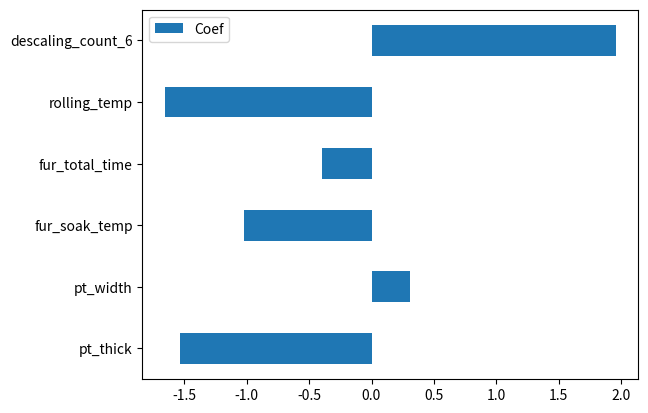

In [55]:
df_logistic_coef = pd.DataFrame({"Coef":log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y="Coef")

- 주요 변수에 대한 설명변수 중요도를 나타낸 것이다. descaling_count_6이 양의 관계로 높고, rolling_temp와 pt_thick가 음의 관계로 높았다.

# 분류 분석 2) 의사결정나무

In [56]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   scale                994 non-null    int64
 1   pt_thick             994 non-null    int64
 2   pt_width             994 non-null    int64
 3   fur_heat_temp        994 non-null    int64
 4   fur_soak_temp        994 non-null    int64
 5   fur_soak_time        994 non-null    int64
 6   fur_total_time       994 non-null    int64
 7   rolling_temp         994 non-null    int64
 8   work_group_주간        994 non-null    uint8
 9   descaling_count_6    994 non-null    uint8
 10  descaling_count_7    994 non-null    uint8
 11  descaling_count_8    994 non-null    uint8
 12  descaling_count_9    994 non-null    uint8
 13  descaling_count_10   994 non-null    uint8
 14  steel_kind_T         994 non-null    uint8
 15  rolling_method_TMCP  994 non-null    uint8
 16  hsb_적용               994 n

In [57]:
df_x = df_dummy.drop("scale",axis = 1)
df_y = df_dummy["scale"]
df_y.head()

0    1
1    1
2    1
3    1
4    1
Name: scale, dtype: int64

In [58]:
# train / test 데이터 분할

df_train_x, df_test_x,df_train_y, df_test_y = train_test_split(df_x,df_y,test_size = 0.3, random_state = 1234)

print("분할 전 설명변수 데이터",df_x.shape)
print("분할 후 설명변수 데이터",df_train_x.shape," Test",df_test_x.shape)

분할 전 설명변수 데이터 (994, 16)
분할 후 설명변수 데이터 (695, 16)  Test (299, 16)


scale
1        684
0        310
dtype: int64 

scale = 1 비율  scale
True     0.688129
False    0.311871
dtype: float64


/tmp/ipykernel_29668/2244878272.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'] = np.where(df_dummy["scale"]==1,"red","blue")


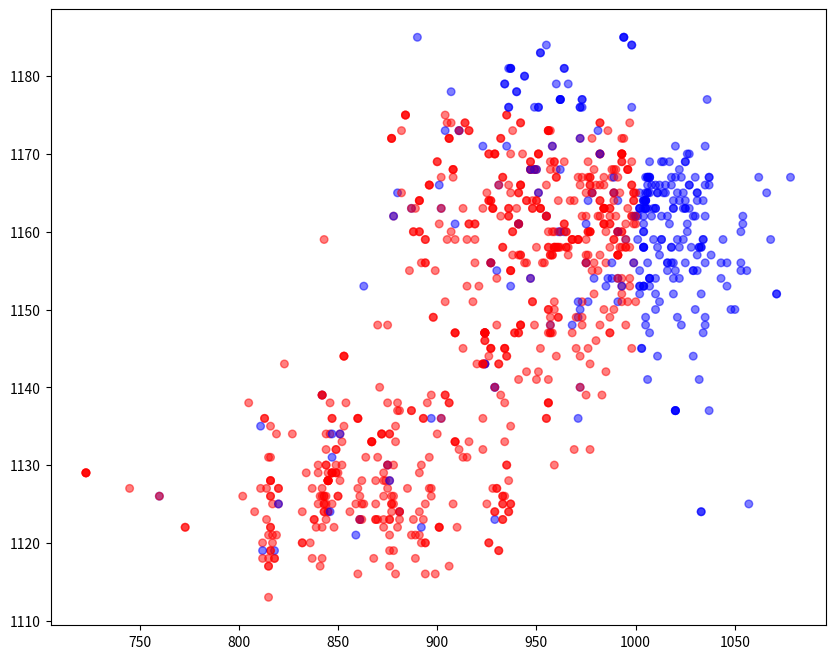

In [59]:
from imblearn.over_sampling import SMOTE

# 정확한 평가를 위해 oversampling

print(df_dummy.value_counts(["scale"]),"\n")
print("scale = 1 비율 ", df_dummy.value_counts(df_dummy["scale"]==1)/len(df))

# rolling_temp와 fur_soak_temp에 대해 산점도
plt.figure(figsize =(10,8))
df['color'] = np.where(df_dummy["scale"]==1,"red","blue")

plt.scatter(df_dummy['rolling_temp'],df_dummy['fur_soak_temp'],c=df['color'],s=30,alpha = 0.5)
plt.show()

Over-Sampling 전:
 1    473
0    222
Name: scale, dtype: int64 

Over-Sampling 후 Train X:(946, 16)
Over-Sampling 후 Train Y:(946,)

Over-Sampling 후 '1':473
Over-Sampling 후 '0':473
   pt_thick  pt_width  fur_heat_temp  fur_soak_temp  fur_soak_time  \
0        26      2600           1165           1160             63   
1        20      2500           1171           1170             57   
2        17      2800           1142           1147             69   
3        16      2500           1144           1150             59   
4        15      2500           1180           1162             53   

   fur_total_time  rolling_temp  work_group_주간  descaling_count_6  \
0             223          1026              0                  0   
1             235          1027              1                  0   
2             302           957              0                  0   
3             219           972              1                  0   
4             217           998              1          

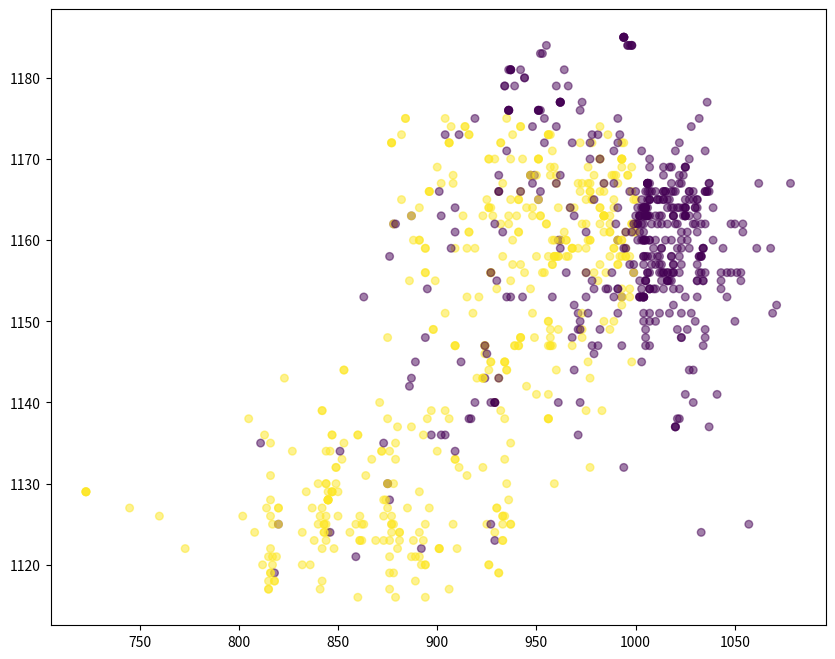

In [60]:
# over-sampling  설정
sm = SMOTE(sampling_strategy = 'auto')
x_resampled, y_resampled = sm.fit_resample(df_train_x,df_train_y)

print('Over-Sampling 전:\n', df_train_y.value_counts(),"\n")
print('Over-Sampling 후 Train X:{}'.format(x_resampled.shape))
print('Over-Sampling 후 Train Y:{}\n'.format(y_resampled.shape))
print("Over-Sampling 후 '1':{}".format(sum(y_resampled==1)))
print("Over-Sampling 후 '0':{}".format(sum(y_resampled==0)))

df_resampled = pd.concat([x_resampled, y_resampled], axis =1)
print(df_resampled.head())

plt.figure(figsize = (10,8))
plt.scatter(df_resampled['rolling_temp'],df_resampled['fur_soak_temp'],c=df_resampled['scale'], s=30,alpha=0.5)
plt.show()

In [61]:
# 기본 옵션으로 모델 생성

tree_uncust = DecisionTreeClassifier(random_state = 1234)
tree_uncust.fit(df_train_x,df_train_y)


print("Accuracy on training set: {:.3f}".format(tree_uncust.score(df_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(tree_uncust.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set:1.000


- train 데이터와 test 데이터가 각각 100%로 엄청난 성능을 보였다.

In [62]:
print(tree_uncust.get_params().keys())
print(tree_uncust.get_params().values())

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
dict_values([0.0, None, 'gini', None, None, None, 0.0, 1, 2, 0.0, 1234, 'best'])


In [63]:
# max_depth의 수 조정
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(1,12)]
for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state = 1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy


In [64]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.876,0.880
1,2,0.919,0.930
2,3,0.957,0.967
3,4,0.984,0.983
4,5,0.994,0.993
5,6,0.994,0.993
6,7,1.000,1.000
7,8,1.000,1.000
8,9,1.000,1.000
9,10,1.000,1.000


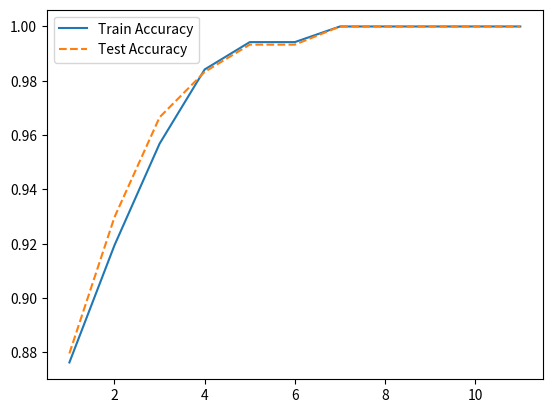

In [65]:
plt.plot(para_depth, train_accuracy,linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy,linestyle = "--", label = "Test Accuracy")
plt.legend()

- depth의 길이가 많으면 오버피팅의 문제가 생긴다. 따라서, train 데이터의 정확도가 1이 되기 전, max_depth가 5가 가장 차이가 작으므로 5로 결정한다.

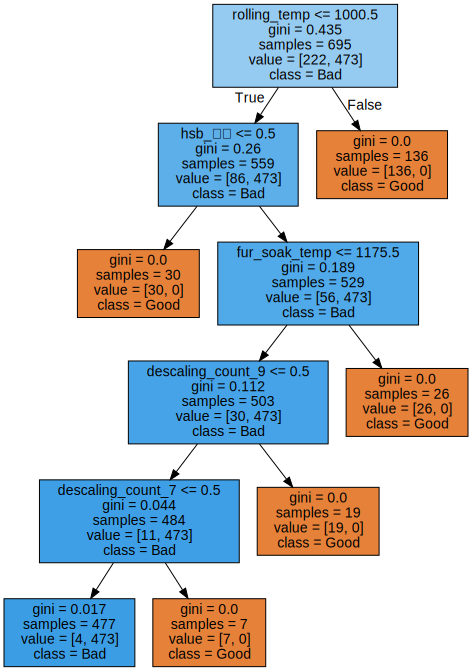

In [66]:
v_feature_name = df_train_x.columns

tree_low = DecisionTreeClassifier(max_depth = 5, random_state =1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low,out_file = "tree_low.dot", class_names = ["Good","Bad"], feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_low.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))



In [67]:
# 분리 노드의 최소 자류 수 변경에 따른 모델 성능 비교를 위한 전체 자료 수 고려
print("전체 자료 = ", df_train_x.shape[0],"개")
print("전체 자료의 1% =",df_train_x.shape[0]*0.01,"개")

train_accuracy = []; test_accuracy = []
para_split = [n_split*10 for n_split in range(2,60)]

# min_sampled_splig 조정
for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split,max_depth = 5,random_state =1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

전체 자료 =  695 개
전체 자료의 1% = 6.95 개


In [68]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.994,0.993
1,30,0.994,0.993
2,40,0.994,0.993
3,50,0.994,0.993
4,60,0.994,0.993
5,70,0.994,0.993
6,80,0.994,0.993
7,90,0.994,0.993
8,100,0.994,0.993
9,110,0.994,0.993


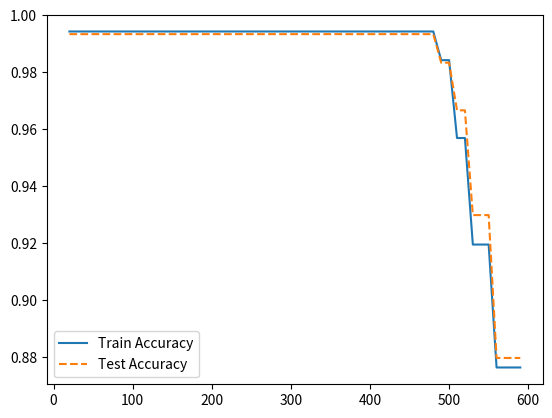

In [69]:
plt.plot(para_split, train_accuracy,linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy,linestyle = "--", label = "Test Accuracy")
plt.legend()

- min_samples_split의 수를 80으로 결정한다.

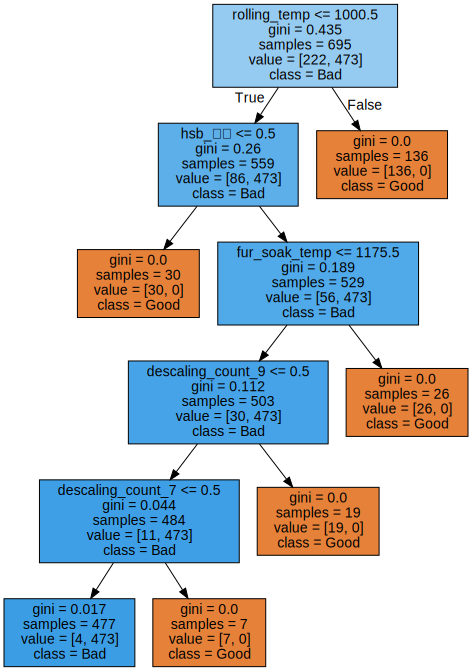

In [70]:
# max_depth가 5, min_samples_split이 80일 때 트리 모형 보기

tree_low = DecisionTreeClassifier(max_depth = 5, min_samples_split = 80, random_state =1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low,out_file = "tree_low.dot", class_names = ["Good","Bad"], feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_low.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [71]:
# min_samples_leaf 조정

train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf*2 for n_leaf in range(5,16)]
for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split = 80, max_depth = 5, random_state = 1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy


In [72]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.984,0.983
1,12,0.984,0.983
2,14,0.984,0.983
3,16,0.984,0.983
4,18,0.984,0.983
5,20,0.957,0.967
6,22,0.957,0.967
7,24,0.957,0.967
8,26,0.957,0.967
9,28,0.951,0.960


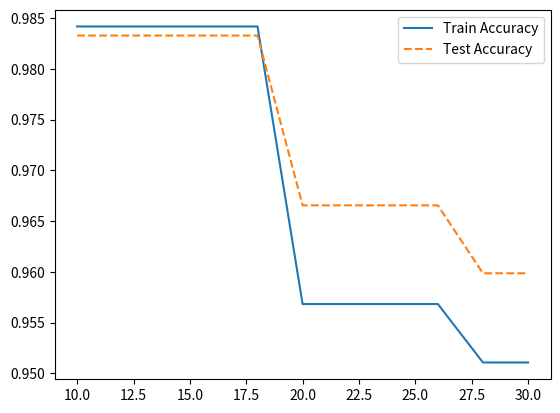

In [73]:
plt.plot(para_leaf, train_accuracy,linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy,linestyle = "--", label = "Test Accuracy")
plt.legend()

- min_samples_leaf는 값이 너무 작을 때, 오버피팅의 문제가 발생한다.이를 기반으로 오차가 작은 것을 확인한 결과 18일 때 오차가 적었다. 따라서 min_sample_leaf의 수를 18로 결정한다.

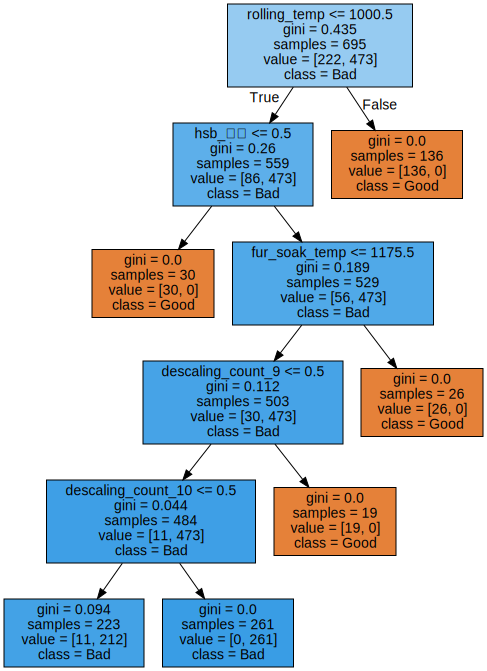

In [74]:
# max_depth가 5, min_samples_split이 80, min_samples_leaf가 18일 때 트리 모형 보기

tree_high = DecisionTreeClassifier(max_depth = 5,min_samples_split = 80,min_samples_leaf = 18, random_state =1234)
tree_high.fit(df_train_x, df_train_y)

export_graphviz(tree_high,out_file = "tree_high.dot", class_names = ["Good","Bad"], feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_high.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [75]:
# 의사결정 모형 최종 모델
tree_final = DecisionTreeClassifier(max_depth = 5, min_samples_split=80, min_samples_leaf =18 , random_state =1234)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=18, min_samples_split=80,
                       random_state=1234)

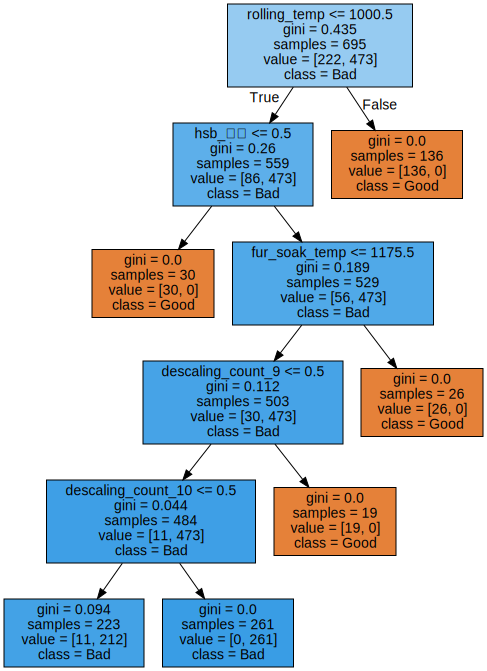

In [76]:
export_graphviz(tree_final, out_file = "tree_final.dot", class_names = ["Good","Bad"],feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_final.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [77]:
# 평가
y_pred = tree_final.predict(df_test_x)
print("Test Accurancy:{0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Test Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Test Accurancy:0.983

Test Confusion matrix:
[[ 83   5]
 [  0 211]]


In [78]:
print(classification_report(df_test_y,y_pred,digits = 3))

              precision    recall  f1-score   support

           0      1.000     0.943     0.971        88
           1      0.977     1.000     0.988       211

    accuracy                          0.983       299
   macro avg      0.988     0.972     0.980       299
weighted avg      0.984     0.983     0.983       299



- 양품에 대한 예측률이 97%, 불량품에 대한 예측률이 100%인 것을 확인했다.
- 하지만 recall의 경우, 양품이 100%, 불량품이 94.3%로 불량품이 예측률이 좋았지만 재현율이 낮은 것을 확인할 수 있었다.
- f1-score의 경우, 양품에 대해서 높은 모습을 보여주었다.
- 그러나 불량품에 대한 오버피팅 문제는 피해갈 수 없을 것 같다.

In [79]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

In [80]:
df_importance.sort_values("Importance", ascending = False, inplace =True)
df_importance.round(3)

,Feature,Importance
6,rolling_temp,0.557
15,hsb_적용,0.161
3,fur_soak_temp,0.155
11,descaling_count_9,0.124
12,descaling_count_10,0.002
0,pt_thick,0.000
1,pt_width,0.000
2,fur_heat_temp,0.000
4,fur_soak_time,0.000
5,fur_total_time,0.000


Text(0, 0.5, '설명변수')

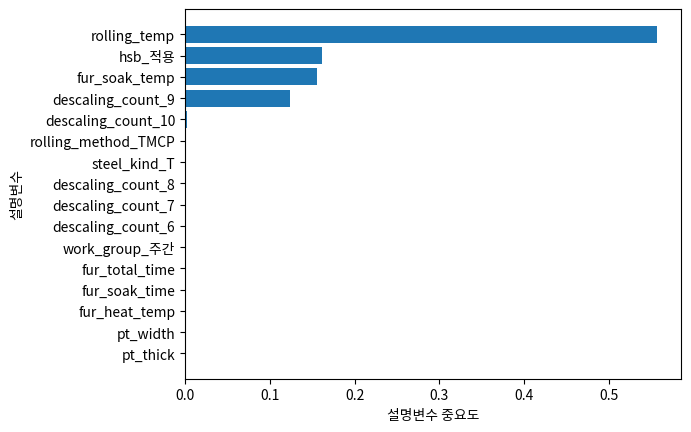

In [81]:
df_importance.sort_values("Importance", ascending = True, inplace =True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

- 최종 모델에서 설명 변수 중요도를 알아본 결과 rolling temp가 가장 높은 것을 확인했다.
- 두 번째로 높은 중요도를 보인 변수는 hsb_적용 유무이다.

- 성능향상을 위한 max_depth = 6으로 의사결정나무 추가 진행

In [82]:
print("전체 자료 = ", df_train_x.shape[0],"개")
print("전체 자료의 1% =",df_train_x.shape[0]*0.01,"개")

train_accuracy = []; test_accuracy = []
para_split = [n_split*10 for n_split in range(2,60)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split,max_depth = 6,random_state =1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

전체 자료 =  695 개
전체 자료의 1% = 6.95 개


In [83]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.994,0.993
1,30,0.994,0.993
2,40,0.994,0.993
3,50,0.994,0.993
4,60,0.994,0.993
5,70,0.994,0.993
6,80,0.994,0.993
7,90,0.994,0.993
8,100,0.994,0.993
9,110,0.994,0.993


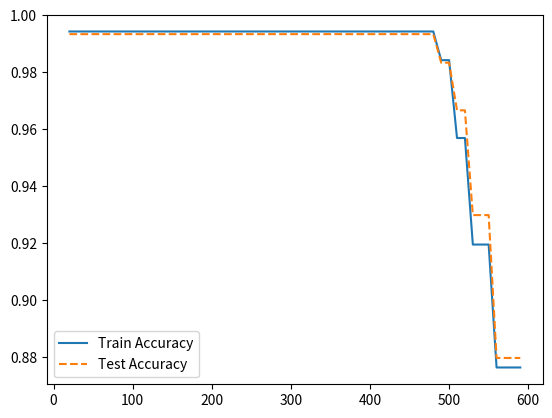

In [84]:
plt.plot(para_split, train_accuracy,linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy,linestyle = "--", label = "Test Accuracy")
plt.legend()

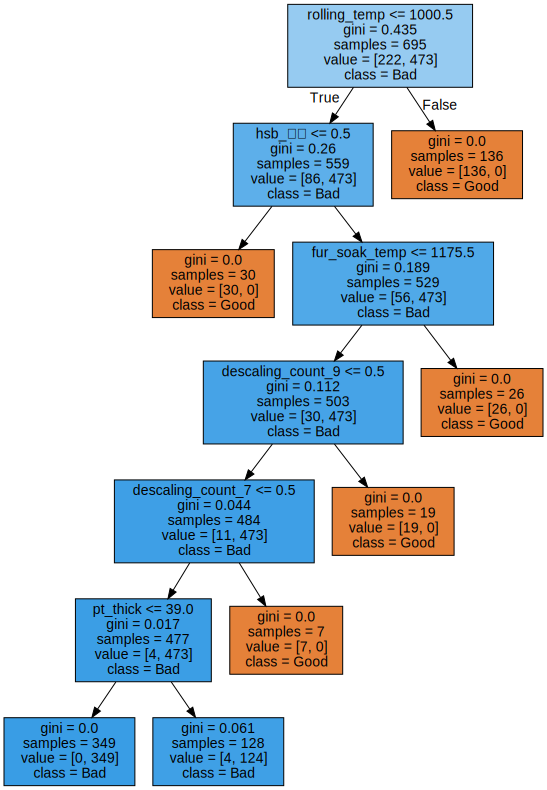

In [85]:
tree_low = DecisionTreeClassifier(max_depth = 6, min_samples_split = 80, random_state =1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low,out_file = "tree_low.dot", class_names = ["Good","Bad"], feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_low.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))



In [86]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf*2 for n_leaf in range(5,16)]
for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split = 80, max_depth = 6, random_state = 1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy


In [87]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.984,0.983
1,12,0.984,0.983
2,14,0.984,0.983
3,16,0.984,0.983
4,18,0.984,0.983
5,20,0.957,0.967
6,22,0.957,0.967
7,24,0.957,0.967
8,26,0.957,0.967
9,28,0.951,0.960


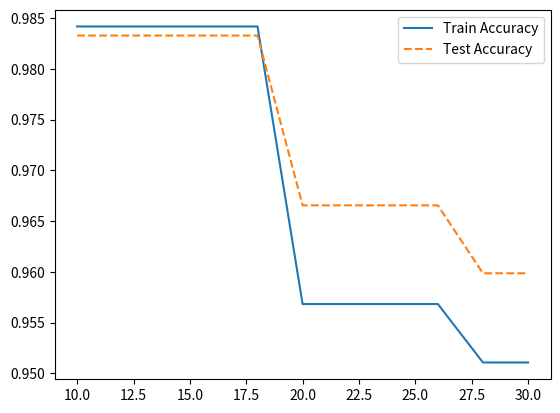

In [88]:
plt.plot(para_leaf, train_accuracy,linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy,linestyle = "--", label = "Test Accuracy")
plt.legend()

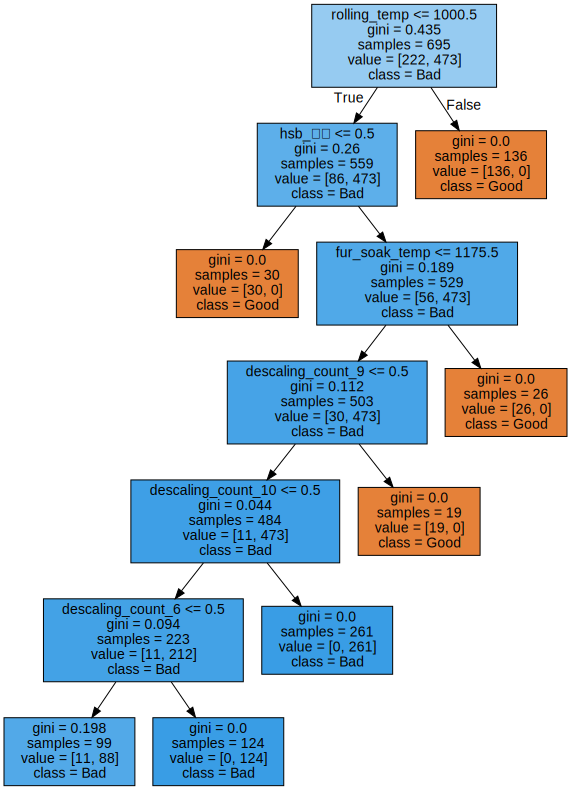

In [89]:
tree_high = DecisionTreeClassifier(max_depth = 6,min_samples_split = 80,min_samples_leaf = 18, random_state =1234)
tree_high.fit(df_train_x, df_train_y)

export_graphviz(tree_high,out_file = "tree_high.dot", class_names = ["Good","Bad"], feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_high.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [90]:
tree_final = DecisionTreeClassifier(max_depth = 6, min_samples_split=80, min_samples_leaf =18 , random_state =1234)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=18, min_samples_split=80,
                       random_state=1234)

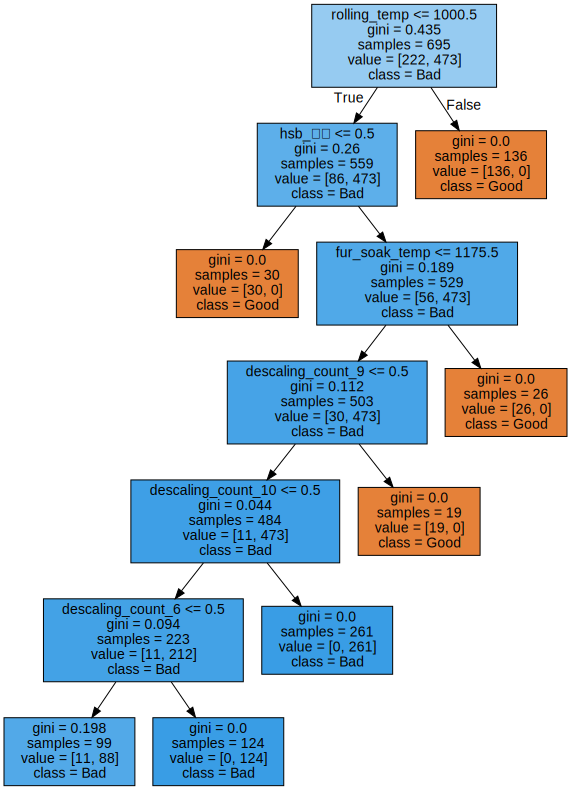

In [91]:
export_graphviz(tree_final, out_file = "tree_final.dot", class_names = ["Good","Bad"],feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_final.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [92]:
y_pred = tree_final.predict(df_test_x)
print("Test Accuracy:{0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Test Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Test Accuracy:0.983

Test Confusion matrix:
[[ 83   5]
 [  0 211]]


In [93]:
print(classification_report(df_test_y,y_pred,digits = 3))

              precision    recall  f1-score   support

           0      1.000     0.943     0.971        88
           1      0.977     1.000     0.988       211

    accuracy                          0.983       299
   macro avg      0.988     0.972     0.980       299
weighted avg      0.984     0.983     0.983       299



In [94]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

In [95]:
df_importance.sort_values("Importance", ascending = False, inplace =True)
df_importance.round(3)

,Feature,Importance
6,rolling_temp,0.554
15,hsb_적용,0.161
3,fur_soak_temp,0.155
11,descaling_count_9,0.124
8,descaling_count_6,0.005
12,descaling_count_10,0.002
0,pt_thick,0.000
1,pt_width,0.000
2,fur_heat_temp,0.000
4,fur_soak_time,0.000


Text(0, 0.5, '설명변수')

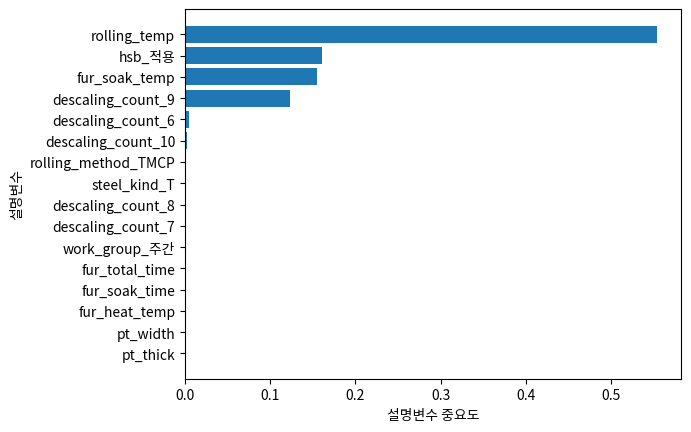

In [96]:
df_importance.sort_values("Importance", ascending = True, inplace =True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

- max_depth = 5, 6의 경우에 대해 진행 <br>
- max_depth = 6 의 경우 rolling_temp가 0.003감소하고, descaling_count_6 0.005증가함을 확인함.<br>
- descaling_count_10이 max_depth = 5,6두 가지 경우에 대해 중요도가 있다고 판별되어, 이는 목표 변수에 영향을 미치는 변수라 판단하였고, 그에 따라 descaling_count_6 또한 영향을 미칠 것이라 판단하여 max_depth = 6을 최종모델로 선정함.  



In [97]:
# grid search
estimator = DecisionTreeClassifier()

param_grid = {"max_depth" : para_depth, "min_samples_split":para_split,"min_samples_leaf" : para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model : \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter : \n{}".format(grid_dt.best_params_))
print("\nbest score : \n{}".format(grid_dt.best_score_.round(3)))

best estimator model : 
DecisionTreeClassifier(max_depth=6, min_samples_leaf=14, min_samples_split=20)

best parameter : 
{'max_depth': 6, 'min_samples_leaf': 14, 'min_samples_split': 20}

best score : 
0.986


# 분류 분석 3) 랜덤포레스트

In [98]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   scale                994 non-null    int64
 1   pt_thick             994 non-null    int64
 2   pt_width             994 non-null    int64
 3   fur_heat_temp        994 non-null    int64
 4   fur_soak_temp        994 non-null    int64
 5   fur_soak_time        994 non-null    int64
 6   fur_total_time       994 non-null    int64
 7   rolling_temp         994 non-null    int64
 8   work_group_주간        994 non-null    uint8
 9   descaling_count_6    994 non-null    uint8
 10  descaling_count_7    994 non-null    uint8
 11  descaling_count_8    994 non-null    uint8
 12  descaling_count_9    994 non-null    uint8
 13  descaling_count_10   994 non-null    uint8
 14  steel_kind_T         994 non-null    uint8
 15  rolling_method_TMCP  994 non-null    uint8
 16  hsb_적용               994 n

In [99]:
df_x = df_dummy.drop('scale',axis=1,inplace=False)
df_y = df_dummy['scale']

df_train_x, df_test_x, df_train_y, df_test_y=train_test_split(df_x, df_y, test_size=0.3, random_state=700)

print('분할 전 설명변수 데이터:', df_x.shape)
print('분할 후 설명변수 데이터:Train', df_train_x.shape, 'Test',df_test_x.shape)

분할 전 설명변수 데이터: (994, 16)
분할 후 설명변수 데이터:Train (695, 16) Test (299, 16)


In [100]:
rf_uncust = RandomForestClassifier(random_state=700)
rf_uncust.fit(df_train_x, df_train_y)

RandomForestClassifier(random_state=700)

In [101]:
print('Accuracy on training set: {:.3f}'.format(rf_uncust.score(df_train_x, df_train_y)))
print('Accuracy on test set: {:.3f}'.format(rf_uncust.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.990


- train 데이터에 대해서 정확도가 100%, test 데이터에 대해서 99%의 정확도를 보인다.

In [102]:
print(rf_uncust.get_params().keys())
print(rf_uncust.get_params().values())

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
dict_values([True, 0.0, None, 'gini', None, 'sqrt', None, None, 0.0, 1, 2, 0.0, 100, None, False, 700, 0, False])


In [103]:
# 트리 수 변경에 따른 모델 성능
train_accuracy = []
test_accuracy= []

para_n_tree = [n_tree * 10 for n_tree in range(1,31)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators=v_n_estimators, random_state=700)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy
df_accuracy_n['Gap'] = df_accuracy_n['TrainAccuracy'] - df_accuracy_n['TestAccuracy']


df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy,Gap
0,10,0.999,0.990,0.009
1,20,1.000,0.990,0.010
2,30,0.999,0.990,0.009
3,40,0.999,0.990,0.009
4,50,1.000,0.990,0.010
5,60,1.000,0.990,0.010
6,70,1.000,0.990,0.010
7,80,1.000,0.993,0.007
8,90,1.000,0.990,0.010
9,100,1.000,0.990,0.010


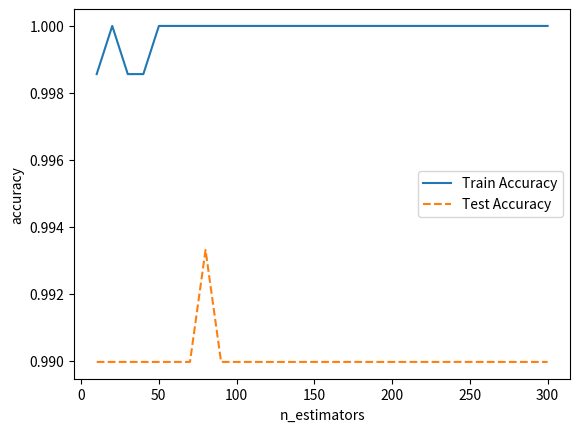

In [104]:
plt.plot(para_n_tree, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.legend()

In [105]:
# 트리 수 변경에 따른 모델 oob error 변화
oob_error = []

for v_n_estimator in range(80,300):
    rf = RandomForestClassifier(n_estimators=v_n_estimator, oob_score=True, random_state=700)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score_)

Text(0.5, 0, 'n_estimator')

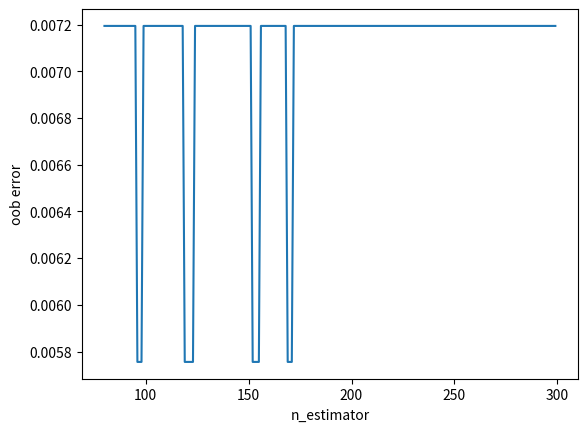

In [106]:
plt.plot(range(80,300),oob_error)
plt.ylabel('oob error')
plt.xlabel('n_estimator')

- n_estimator이 50부터 train 데이터에 대해 100%의 성능을 보인다. oob error가 증가했다가 감소하는 것을 반복하다가 약 200대에서 안정적으로 수렴하는 모습을 확인했다. 트리 수를 늘려 안정적인 앙상블 모델을 개발하기 위해 n_estimator은 200개로 결정한다.

In [107]:
# 최대 깊이 변경에 따른 모델 성능
train_accuracy = []
test_accuracy= []

para_depth = [depth for depth in range(3,16)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth=v_max_depth, n_estimators=200, random_state=700)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy
df_accuracy_depth['Gap'] = df_accuracy_depth['TrainAccuracy'] - df_accuracy_depth['TestAccuracy']

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy,Gap
0,3,0.955,0.960,-0.004
1,4,0.978,0.983,-0.005
2,5,0.987,0.983,0.004
3,6,0.994,0.990,0.004
4,7,0.994,0.990,0.004
5,8,0.996,0.990,0.006
6,9,0.996,0.990,0.006
7,10,0.999,0.990,0.009
8,11,1.000,0.990,0.010
9,12,1.000,0.990,0.010


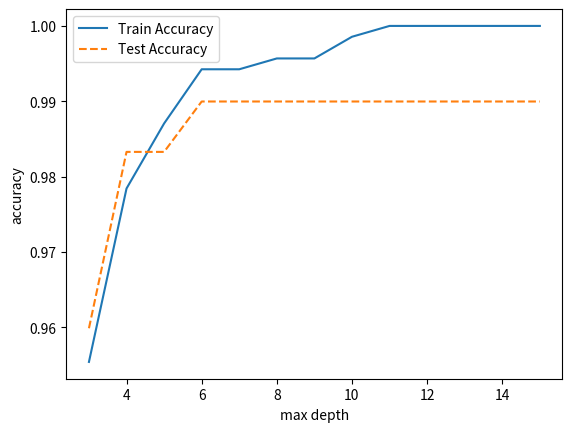

In [108]:
plt.plot(para_depth, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('max depth')
plt.legend()

- depth의 길이가 많으면 오버피팅의 문제가 발생한다. 차이가 많이 나지 않은 범위에서 trian 정확도가 높은 8을 max_depth 파라미터의 값으로 결정한다.

In [109]:
# 분리 노드의 최소 자료 수 변경에 따른 모델 성능
train_accuracy = []
test_accuracy= []

para_split = [n_split for n_split in range(1,11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split=v_min_samples_split, max_depth=8, n_estimators=200, random_state=700)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_split= pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy
df_accuracy_split['Gap'] = df_accuracy_split['TrainAccuracy'] - df_accuracy_split['TestAccuracy']

df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy,Gap
0,1,0.996,0.99,0.006
1,2,0.996,0.99,0.006
2,3,0.994,0.99,0.004
3,4,0.994,0.99,0.004
4,5,0.994,0.99,0.004
5,6,0.994,0.99,0.004
6,7,0.994,0.99,0.004
7,8,0.994,0.99,0.004
8,9,0.994,0.99,0.004
9,10,0.994,0.99,0.004


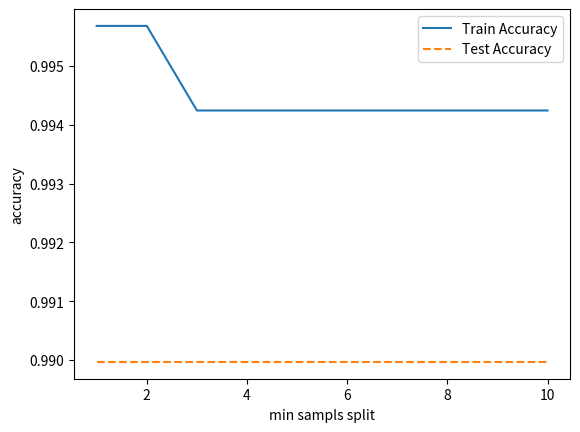

In [110]:
plt.plot(para_split, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('min sampls split')
plt.legend()

- 분리 노드의 최소 자료수를 변경해도 모델 성능을 높이는 데 큰 의미가 없다고 판단하여 최종 모델에 split 하이퍼 파라미터를 제외시키기로 결정하였다.

In [111]:
# 잎사귀 노드의 최소 자료 수 변경에 다른 모델 성능
train_accuracy = []
test_accuracy= []

para_leaf = [n_leaf * 5 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf=v_min_samples_leaf, max_depth=8, n_estimators=200, random_state=700)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_leaf= pd.DataFrame()
df_accuracy_leaf['MinSamplesleaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy
df_accuracy_leaf['Gap'] = df_accuracy_leaf['TrainAccuracy'] - df_accuracy_leaf['TestAccuracy']

df_accuracy_leaf.round(3)

,MinSamplesleaf,TrainAccuracy,TestAccuracy,Gap
0,5,0.987,0.983,0.004
1,10,0.984,0.980,0.004
2,15,0.954,0.963,-0.009
3,20,0.914,0.946,-0.033
4,25,0.894,0.923,-0.030
5,30,0.872,0.910,-0.038
6,35,0.862,0.903,-0.041
7,40,0.862,0.903,-0.041
8,45,0.862,0.903,-0.041
9,50,0.862,0.903,-0.041


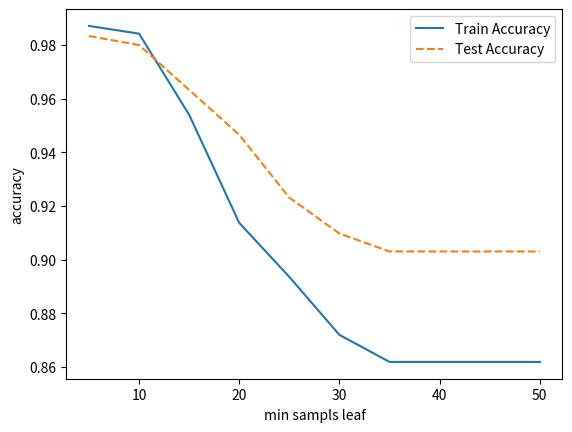

In [112]:
plt.plot(para_leaf, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('min sampls leaf')
plt.legend()

- train data의 정확도가 90% 이상인 것 중에서 잎사귀 노드의 최소 자료수가 많은 것을 골랐다. 너무 적은 값으로 설정하면 오버피팅의 문제가 발생할 수 있기 때문이다. min_sample_leaf의 하이퍼파라미터의 값은 20으로 결정한다.

In [113]:
# 최종 모델
rf_final = RandomForestClassifier( min_samples_leaf=20, max_depth=8, n_estimators=200, random_state=700)

rf_final.fit(df_train_x, df_train_y)
y_pred = rf_final.predict(df_test_x)

print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 0.914
Accuracy on test set: 0.946

Confusion matrix: 
[[ 69  16]
 [  0 214]]
              precision    recall  f1-score   support

           0      1.000     0.812     0.896        85
           1      0.930     1.000     0.964       214

    accuracy                          0.946       299
   macro avg      0.965     0.906     0.930       299
weighted avg      0.950     0.946     0.945       299



- train 모델의 정확도는 91.4%이고 test 모델의 정확도는 94.6%이다.
- 양품기준 f1 score는 96.4%으로 높은 축에 속하지만, 불량품을 기준으로 f1 score는 89.6%로 낮은 편이다.

In [114]:
# 결론 도출
# 설명변수의 중요도
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
6,rolling_temp,0.482
3,fur_soak_temp,0.115
1,pt_width,0.071
15,hsb_적용,0.064
0,pt_thick,0.057
2,fur_heat_temp,0.055
12,descaling_count_10,0.050
13,steel_kind_T,0.035
4,fur_soak_time,0.022
5,fur_total_time,0.020


- 랜덤포레스트 결과 **rolling_temp 변수**가 가장 중요한 것을 알 수 있다.
- fur_soak_temp가 2번째로 중요한 변수이다.

Text(0, 0.5, '설명변수')

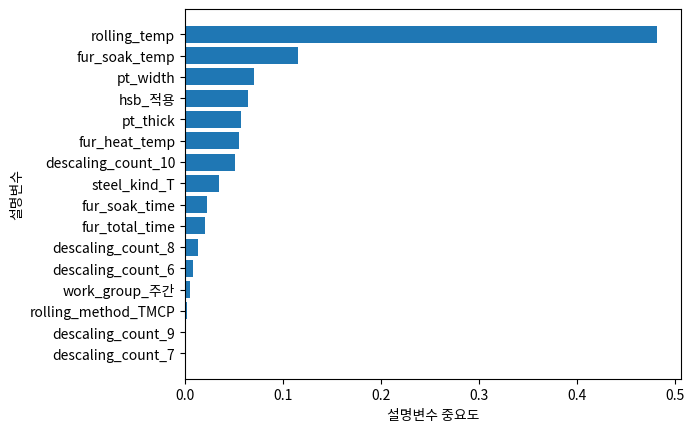

In [115]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

# 분류 분석 4) 그래디언트 부스팅

In [116]:
df_raw_y = df_dummy["scale"]
df_raw_x = df_dummy.drop("scale",axis = 1, inplace = False)

In [117]:
# train data / test 데이터를 분할

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3,random_state=2023)
print("train data X size : {}". format(df_train_x.shape))
print("train data T size : {}". format(df_train_y.shape))
print("test data X size : {}". format(df_test_x.shape))
print("test data Y size : {}". format(df_test_y.shape))

train data X size : (695, 16)
train data T size : (695,)
test data X size : (299, 16)
test data Y size : (299,)


In [118]:
# 그래디언트 부스팅 기본 모델 생성

gb_uncust = GradientBoostingClassifier(random_state=2023)
gb_uncust.fit(df_train_x, df_train_y)
              
# train 모델 정확도
print("Accuracy on training other : {:.3f}".format(gb_uncust.score(df_train_x, df_train_y)))
              
# test 모델 정확도
print("Accuracy on test other : {:.3f}".format(gb_uncust.score(df_test_x, df_test_y)))


Accuracy on training other : 1.000
Accuracy on test other : 0.987


- Train의 정확도는 100%, Test의 정확도는 98.7%로 성능이 양호하고 유사하지만 과대적합이 의심되지만 우연일지 알 수 없다.

In [119]:
print(gb_uncust.get_params().keys())
print(gb_uncust.get_params().values())

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values([0.0, 'friedman_mse', None, 0.1, 'log_loss', 3, None, None, 0.0, 1, 2, 0.0, 100, None, 2023, 1.0, 0.0001, 0.1, 0, False])


In [120]:
train_accuracy = []
test_accuracy = []

# learning rate 학습률 변경
para_lr = [lr * 0.01 for lr in range(1, 10)]

for v_learning_rate in para_lr :
    gb = GradientBoostingClassifier(learning_rate=v_learning_rate,random_state=2023)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy
df_accuracy_lr["gap"] = df_accuracy_lr["TrainAccuracy"] - df_accuracy_lr["TestAccuracy"]
# learning rate별 정확도
df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy,gap
0,0.01,0.968,0.940,0.029
1,0.02,0.990,0.973,0.017
2,0.03,0.997,0.987,0.011
3,0.04,0.997,0.987,0.011
4,0.05,0.997,0.987,0.011
5,0.06,0.997,0.987,0.011
6,0.07,1.000,0.987,0.013
7,0.08,1.000,0.987,0.013
8,0.09,1.000,0.987,0.013


- 학습률이 증가할수록 train과 test의 정확도는 증가하지만 과대적합 방지를 고려하여 0.03에서 세밀한 변화를 확인하기로 하였다.

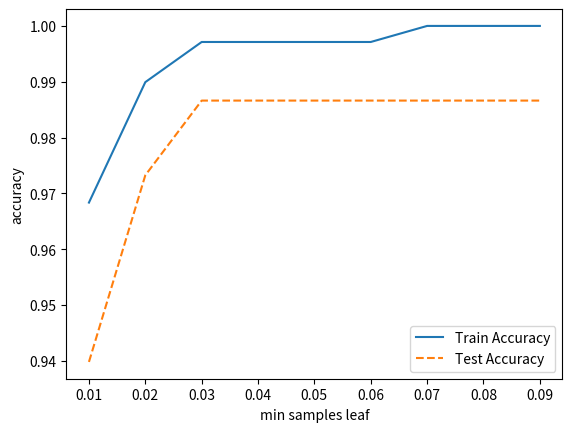

In [121]:
plt.plot(para_lr, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples leaf")
plt.ylabel("accuracy")
plt.legend()

In [122]:
train_accuracy =[]
test_accuracy = []

# n_estimators : 트리수 변경 
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree :
    gb = GradientBoostingClassifier(n_estimators= v_n_estimators, learning_rate = 0.02, random_state=2023)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy
df_accuracy_n["gap"] = df_accuracy_n["TrainAccuracy"] - df_accuracy_n["TestAccuracy"]

# 모델 정확도 확인
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy,gap
0,10,0.681,0.706,-0.025
1,20,0.968,0.940,0.029
2,30,0.968,0.940,0.029
3,40,0.968,0.940,0.029
4,50,0.968,0.940,0.029
5,60,0.988,0.973,0.015
6,70,0.988,0.973,0.015
7,80,0.988,0.973,0.015
8,90,0.990,0.973,0.017
9,100,0.990,0.973,0.017


- 결정 트리 수 증가에 따라 모델의 정확도는 증가했다. <br> 
- estimators = 60 이후 train과 test의 정확도 gap차이가 높아지기 시작하고 과대적합 방지와 변화를 보기 위해 60을 선택했다.

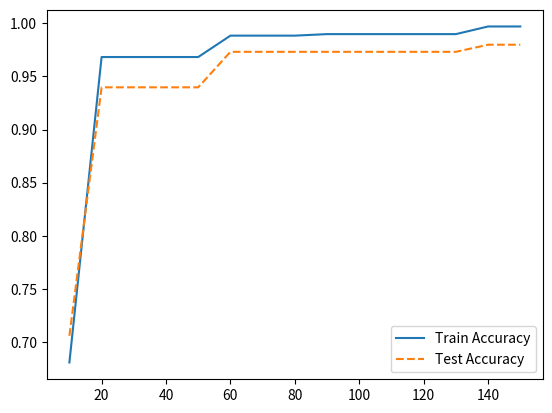

In [123]:
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [124]:
# 모델 파라미터 조정 - max_depth 
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy = []

# max_depth 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth :
    gb = GradientBoostingClassifier(max_depth = v_max_depth, n_estimators = 60, learning_rate = 0.02, random_state=2023)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth["gap"] = df_accuracy_depth["TrainAccuracy"] - df_accuracy_depth["TestAccuracy"]

# 모델 정확도 확인
df_accuracy_depth.round(3) 

,Depth,TrainAccuracy,TestAccuracy,gap
0,1,0.879,0.873,0.006
1,2,0.934,0.910,0.024
2,3,0.988,0.973,0.015
3,4,0.988,0.973,0.015
4,5,0.997,0.987,0.011
5,6,0.997,0.987,0.011
6,7,1.000,1.000,0.000
7,8,1.000,1.000,0.000
8,9,1.000,1.000,0.000
9,10,1.000,1.000,0.000


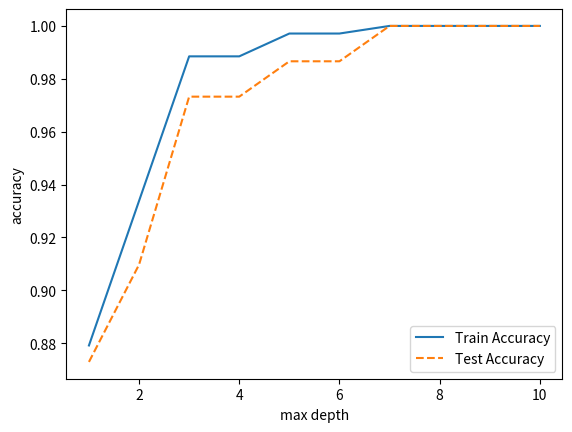

In [125]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.legend()

- Depth의 경우 최대 깊이 증가에 따라 모델의 정확도는 증가한다. <br>
- depth = 5의 경우 train의 정확도는 0.997, test의 정확도는 0.987로 파라미터 특성과 train/test 모델의 정확도 변화를 고려하여 5를 선택한다.

In [126]:
train_accuracy = []
test_accuracy = []

# min_samples_split 분할하기 위한 노드의 최소 샘플 수
para_split = [n_split * 1 for n_split in range(2, 11)]

for v_min_samples_split in para_split :
    gb = GradientBoostingClassifier(min_samples_split = v_min_samples_split, max_depth = 5, n_estimators = 60, random_state=2023)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

# 모델 정확도 확인
df_accuracy_split.round(3) # 변화가 없으니 split은 제거

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,2,1.0,1.0
1,3,1.0,1.0
2,4,1.0,1.0
3,5,1.0,1.0
4,6,1.0,1.0
5,7,1.0,1.0
6,8,1.0,1.0
7,9,1.0,1.0
8,10,1.0,1.0


- split의 같은 경우 Train과 Test의 성능 변화가 없기 때문에 값을 지정하지 않았다.

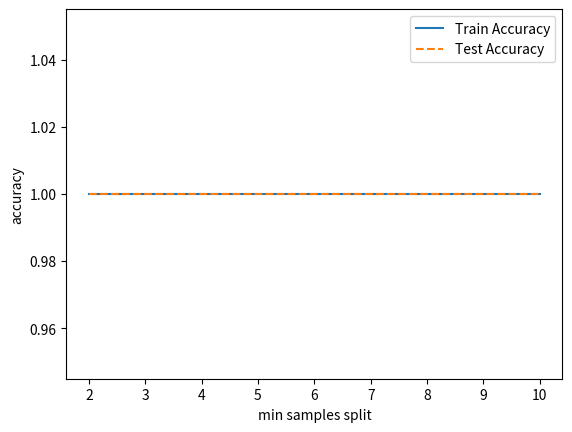

In [127]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples split")
plt.ylabel("accuracy")
plt.legend()

In [128]:
train_accuracy = []
test_accuracy = []

# min_samples_leaf
para_leaf = [n_leaf for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf :
    gb = GradientBoostingClassifier(min_samples_leaf=v_min_samples_leaf, max_depth = 5, n_estimators = 60, learning_rate=0.02, random_state=2023)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy
df_accuracy_leaf["gap"] = df_accuracy_leaf["TrainAccuracy"] - df_accuracy_leaf["TestAccuracy"]

# 모델 정확도 확인
df_accuracy_leaf.round(3) 

,MinSamplesLeaf,TrainAccuracy,TestAccuracy,gap
0,1,0.997,0.987,0.011
1,2,0.997,0.987,0.011
2,3,0.997,0.987,0.011
3,4,0.997,0.987,0.011
4,5,0.997,0.987,0.011
5,6,0.997,0.987,0.011
6,7,0.988,0.973,0.015
7,8,0.988,0.973,0.015
8,9,0.988,0.973,0.015
9,10,0.988,0.973,0.015


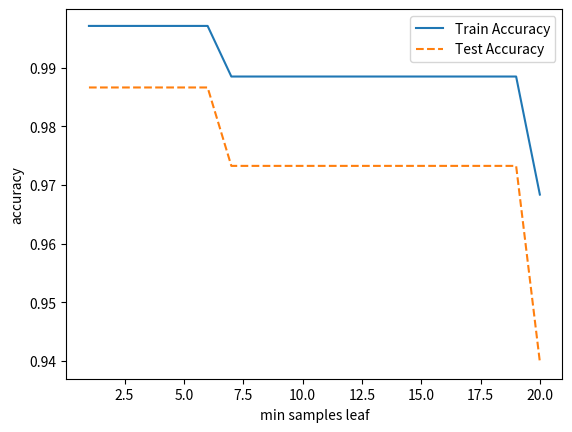

In [129]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples leaf")
plt.ylabel("accuracy")
plt.legend()

In [130]:
# 최종 모델 선정
gb_final = GradientBoostingClassifier(min_samples_leaf=6, max_depth = 5, n_estimators = 60, learning_rate=0.02, random_state=2023)
gb_final.fit(df_train_x, df_train_y)
y_pred = gb_final.predict(df_test_x)

In [131]:
# train 모델 정확도
print("Accuracy on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))

# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

# confusion matrix
print("Confusion Matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score 모델 평가
print(classification_report(df_test_y, y_pred, digits = 3))

Accuracy on training set: 0.997
Accuracy on test set: 0.987
Confusion Matrix : 
[[ 84   4]
 [  0 211]]
              precision    recall  f1-score   support

           0      1.000     0.955     0.977        88
           1      0.981     1.000     0.991       211

    accuracy                          0.987       299
   macro avg      0.991     0.977     0.984       299
weighted avg      0.987     0.987     0.987       299



- 하이퍼 파라미터  learning_reat는 0.02, max_deapth는 5, min_saples_split는 제거, min_samples_leaf는 10, n_estimators는 60을 최종적으로 선택했다. 
- train 데이터에 대해서 99.7%의 정확도, test데이터에 대해서 98.7%의 정확도를 가진다. 과대 적합이 의심되지만 10% 오차 범위 수준 내에서는 오버피팅의 문제는 없다.

In [132]:
v_feature_name = df_train_x.columns

# tree feature_importances로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

# df_feature_importance 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)



,Feature,Importance
6,rolling_temp,0.535
15,hsb_적용,0.175
3,fur_soak_temp,0.162
11,descaling_count_9,0.088
9,descaling_count_7,0.039
4,fur_soak_time,0.000
5,fur_total_time,0.000
2,fur_heat_temp,0.000
0,pt_thick,0.000
7,work_group_주간,0.000


Text(0, 0.5, '설명변수')

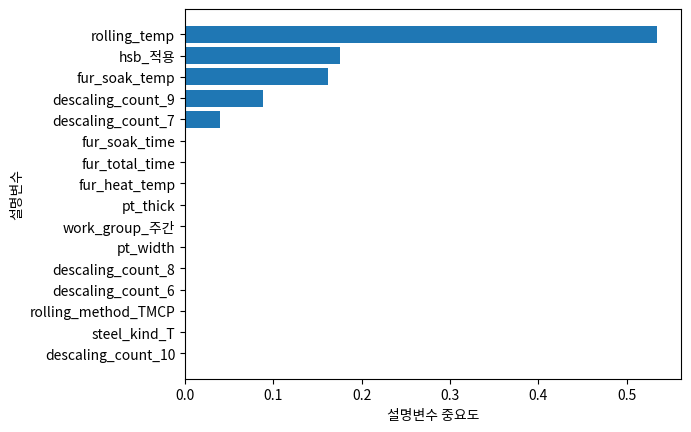

In [133]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

- 설명변수의 중요도같은 경우 'rolling_temp'가 0.535, 'hsb'의 적용여부가 0.175, 'fur_soak_temp'가 0.162, descaling_count_90.088, descaling_count_7 0.039 로 총 5개의 변수가 의미있는 중요도를 가지고 있다.
- 특히, 'rolling_temp','hsb_적용','fur_soak_temp'가 전체의 0.872의 중요도를 가지고 있었다.

In [134]:
estimator = GradientBoostingClassifier(n_estimators=100, random_state=1234)

# 구하고자 하는 parameter와 범위
param_grid = {"learning_rate" : para_lr, "max_depth" : para_depth, "min_samples_leaf" : para_leaf}

# 정확도가 높은 최적 parameter찾기
grid_gb = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs = -1)
grid_gb.fit(df_train_x, df_train_y)
print("best estimator model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_gb.best_params_))
print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))

best estimator model: 
GradientBoostingClassifier(learning_rate=0.05, max_depth=6, min_samples_leaf=16,
                           random_state=1234)

best parameter: 
{'learning_rate': 0.05, 'max_depth': 6, 'min_samples_leaf': 16}

best score: 
0.999


- 그래디언트 부스팅의 최종모델로 정확도를 살펴봤을 때, 95%로 높은 것을 확인했다.

# 최종 평가

In [136]:
df_raw_x = df_dummy.drop("scale", axis = 1, inplace = False)
df_raw_y = df_dummy["scale"]

In [137]:
df_train_x,df_test_x , df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y, test_size = 0.3, random_state = 1234)


print("df_train_x.info(): ",df_train_x.info(),"\n\n")
print("df_train_y.info(): ",df_train_y.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695 entries, 811 to 815
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   pt_thick             695 non-null    int64
 1   pt_width             695 non-null    int64
 2   fur_heat_temp        695 non-null    int64
 3   fur_soak_temp        695 non-null    int64
 4   fur_soak_time        695 non-null    int64
 5   fur_total_time       695 non-null    int64
 6   rolling_temp         695 non-null    int64
 7   work_group_주간        695 non-null    uint8
 8   descaling_count_6    695 non-null    uint8
 9   descaling_count_7    695 non-null    uint8
 10  descaling_count_8    695 non-null    uint8
 11  descaling_count_9    695 non-null    uint8
 12  descaling_count_10   695 non-null    uint8
 13  steel_kind_T         695 non-null    uint8
 14  rolling_method_TMCP  695 non-null    uint8
 15  hsb_적용               695 non-null    uint8
dtypes: int64(7), uint8(9)
me

In [138]:
model = ["DecisionTree","RandomForest","GradientBoosting"]
train_accuracy = []; test_accuracy = []
model_auc = []
model_precision = []; model_recall = []
model_f1_score = []
model 

['DecisionTree', 'RandomForest', 'GradientBoosting']

In [139]:
#의사결정나무
dt_final = DecisionTreeClassifier(max_depth=6, min_samples_split=80, min_samples_leaf=18, random_state=1234)


print("df_train_x.info(): ",df_train_x.info(),"\n\n")
print("df_train_y.info(): ",df_train_y.info())


dt_final.fit(df_train_x, df_train_y)

train_accuracy.append(dt_final.score(df_train_x,df_train_y))
test_accuracy.append(dt_final.score(df_test_x,df_test_y))



y_pred = dt_final.predict(df_test_x)
y_prob_1 = dt_final.predict_proba(df_test_x)[:, 1]
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

# print("df_test_y.info(): ",df_test_y.info())
# print("y_prob_1.info(): ",y_prob_1.info())

fpr, tpr, threshold = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)
model_auc.append(roc_auc)

print("model_precision:", len(model_precision))
print("model_recall:", len(model_recall))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695 entries, 811 to 815
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   pt_thick             695 non-null    int64
 1   pt_width             695 non-null    int64
 2   fur_heat_temp        695 non-null    int64
 3   fur_soak_temp        695 non-null    int64
 4   fur_soak_time        695 non-null    int64
 5   fur_total_time       695 non-null    int64
 6   rolling_temp         695 non-null    int64
 7   work_group_주간        695 non-null    uint8
 8   descaling_count_6    695 non-null    uint8
 9   descaling_count_7    695 non-null    uint8
 10  descaling_count_8    695 non-null    uint8
 11  descaling_count_9    695 non-null    uint8
 12  descaling_count_10   695 non-null    uint8
 13  steel_kind_T         695 non-null    uint8
 14  rolling_method_TMCP  695 non-null    uint8
 15  hsb_적용               695 non-null    uint8
dtypes: int64(7), uint8(9)
me

In [140]:
model_precision.append(precision_score(df_test_y,y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

model_f1_score.append(f1_score(df_test_y,y_pred))
model_f1_score

[0.9882903981264637]

In [141]:
#랜덤포레스트
rf_final = RandomForestClassifier(min_samples_leaf=20, max_depth=8, n_estimators=200, random_state=700)
rf_final.fit(df_train_x, df_train_y)

train_accuracy.append(rf_final.score(df_train_x,df_train_y))
test_accuracy.append(rf_final.score(df_test_x,df_test_y))

y_prob_1 = rf_final.predict_proba(df_test_x)[:,1]
y_pred = rf_final.predict(df_test_x)

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y, y_pred, digits = 3))

fpr,tpr,threshold = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr,tpr)

model_auc.append(roc_auc)

print("model_precision:", len(model_precision))
print("model_recall:", len(model_recall))

Confusion matrix: 
[[ 61  27]
 [  0 211]]
              precision    recall  f1-score   support

           0      1.000     0.693     0.819        88
           1      0.887     1.000     0.940       211

    accuracy                          0.910       299
   macro avg      0.943     0.847     0.879       299
weighted avg      0.920     0.910     0.904       299

model_precision: 1
model_recall: 1


In [142]:
model_precision.append(precision_score(df_test_y,y_pred))
model_recall.append(recall_score(df_test_y,y_pred))

model_f1_score.append(f1_score(df_test_y,y_pred))
model_f1_score

[0.9882903981264637, 0.9398663697104677]

In [143]:
gb_final = GradientBoostingClassifier(max_depth=6, n_estimators = 60, min_samples_leaf=6, learning_rate = 0.02, random_state=2023)
gb_final.fit(df_train_x, df_train_y)

train_accuracy.append(gb_final.score(df_train_x,df_train_y))
test_accuracy.append(gb_final.score(df_test_x,df_test_y))

y_prob_1 = gb_final.predict_proba(df_test_x)[:,1]
y_pred = gb_final.predict(df_test_x)

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y, y_pred, digits = 3))

fpr,tpr,threshold = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr,tpr)

model_auc.append(roc_auc)
print("model_precision:", len(model_precision))
print("model_recall:", len(model_recall))

Confusion matrix: 
[[ 86   2]
 [  0 211]]
              precision    recall  f1-score   support

           0      1.000     0.977     0.989        88
           1      0.991     1.000     0.995       211

    accuracy                          0.993       299
   macro avg      0.995     0.989     0.992       299
weighted avg      0.993     0.993     0.993       299

model_precision: 2
model_recall: 2


In [144]:
model_precision.append(precision_score(df_test_y,y_pred))
model_recall.append(recall_score(df_test_y,y_pred))

model_f1_score.append(f1_score(df_test_y,y_pred))
model_f1_score

[0.9882903981264637, 0.9398663697104677, 0.9952830188679246]

In [145]:
df_eval = pd.DataFrame(index = model)
print("model_precision:", len(model_precision))
print("model_recall:", len(model_recall))
df_eval["TrainAccuracy"] = train_accuracy; df_eval["TestAccuracy"] = test_accuracy
df_eval["AUC"] = model_auc
df_eval["Precision"] = model_precision; df_eval["Recall"] = model_recall
df_eval["F1Score"] = model_f1_score
df_eval.round(3)

model_precision: 3
model_recall: 3


,TrainAccuracy,TestAccuracy,AUC,Precision,Recall,F1Score
DecisionTree,0.984,0.983,0.995,0.977,1.0,0.988
RandomForest,0.911,0.910,0.939,0.887,1.0,0.940
GradientBoosting,0.994,0.993,1.000,0.991,1.0,0.995


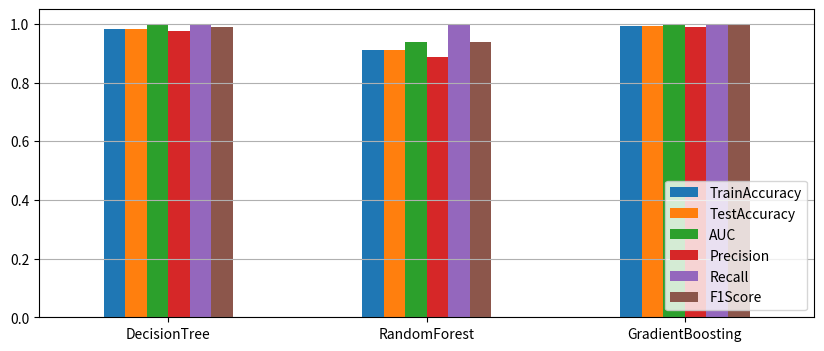

In [146]:
df_eval.plot.bar(rot = 0, figsize = (10,4))
plt.legend(loc = "lower right")
plt.grid(axis="y")

- 최종결과를 살펴봤을 때, 모든 지표에서 가장 우수한 것은 Gradient Boosting인것을 확인했다. 따라서, Gradient Boosting을 최종 모델로 채택한다.